In [2]:
require(data.table)
require(dada2)
require(phyloseq)
require(genefilter)
require(ggplot2)
require(RColorBrewer)
require(metacoder)
require(vegan)
require(DESeq2)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dada2

Loading required package: Rcpp

Loading required package: phyloseq

Loading required package: genefilter

Loading required package: ggplot2

Loading required package: RColorBrewer

Loading required package: metacoder

This is metacoder version 0.3.7 (stable)


Attaching package: ‘metacoder’


The following object is masked from ‘package:ggplot2’:

    map_data


The following object is masked from ‘package:phyloseq’:

    filter_taxa


Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-2

Loading required package: DESeq2

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame,

In [3]:
meta=fread("~/Documents/DE/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [16]:
head(meta)

V1 UniqueID                 Experiment Year Site Treatment1_Density
1 1  2017_NW_HIGH_MONO_B1_CV  Field17    2017 NW   HIGH              
2 2  2017_NW_HIGH_MONO_B11_CV Field17    2017 NW   HIGH              
3 3  2017_NW_HIGH_MONO_B12_CV Field17    2017 NW   HIGH              
4 4  2017_NW_HIGH_MONO_B14_CV Field17    2017 NW   HIGH              
5 5  2017_NW_HIGH_MONO_B18_CV Field17    2017 NW   HIGH              
6 6  2017_NW_HIGH_MONO_P1_CV  Field17    2017 NW   HIGH              
  Treatment2_Diversity Color_Bucket Number Species RFTM_score peacrabs
1 MONO                 B            1      CV      1          0       
2 MONO                 B            11     CV      2          0       
3 MONO                 B            12     CV      0          0       
4 MONO                 B            14     CV      1          0       
5 MONO                 B            18     CV      4          0       
6 MONO                 P            1      CV      1          0       
  Phase_1_DO Phase_1_temp Phase_2_DO Phase_2_Temp Overall_treatment
1                                                                  
2                                                                  
3                                                                  
4                                                                  
5                                                                  
6

In [4]:
#fix rownames
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [5]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
negotucounts=negcounts[,colSums(negcounts)>0]
negotus=colnames(negotucounts)

In [6]:
#pull out the lab dilution effect samples
meta_de=meta[meta$Experiment=="Lab18",]
asv_de=asv_all[rownames(asv_all) %in% meta_de$UniqueID,]
asv_de=asv_de[rowSums(asv_de)>10000,]
asv_de=asv_de[,colSums(asv_de)>0]
taxa_de=taxa[rownames(taxa)%in% colnames(asv_de),]

In [7]:
#for some reason the bracket subsetting was having a hard time with the NAs
taxa_de_clean=subset(taxa_de, Kingdom!="Eukaryota"|is.na(Order))
taxa_de_clean=subset(taxa_de_clean, Order!="Chloroplast"|is.na(Order))

In [8]:
taxa_de=as.matrix(taxa_de)
meta_de=as.data.frame(meta_de)
row.names(meta_de)=meta_de$UniqueID

In [9]:
class(taxa_de)

[1] "matrix" "array"

In [10]:
OTU = otu_table(t(asv_de), taxa_are_rows = TRUE)
TAX = tax_table(taxa_de)
SAMP=sample_data(meta_de)

In [11]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [12]:
DE = phyloseq(OTU, TAX, SAMP)

In [13]:
filtsamp=sample_data(DE)

In [15]:
table(filtsamp$Species, filtsamp$Experiment)

    
     Lab18
  CV    53
  IR    30
  MB     6
  MM     5

In [183]:
DE.ord = ordinate(DE, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.192301 
Run 1 stress 0.2274282 
Run 2 stress 0.2414159 
Run 3 stress 0.2413399 
Run 4 stress 0.2338553 
Run 5 stress 0.193288 
Run 6 stress 0.2232283 
Run 7 stress 0.2121751 
Run 8 stress 0.1927891 
... Procrustes: rmse 0.007993156  max resid 0.06756812 
Run 9 stress 0.1932878 
Run 10 stress 0.2143319 
Run 11 stress 0.2344997 
Run 12 stress 0.192303 
... Procrustes: rmse 0.0008960715  max resid 0.007697319 
... Similar to previous best
Run 13 stress 0.2465639 
Run 14 stress 0.1932876 
Run 15 stress 0.2121682 
Run 16 stress 0.192301 
... Procrustes: rmse 7.094563e-06  max resid 4.054454e-05 
... Similar to previous best
Run 17 stress 0.1932775 
Run 18 stress 0.192303 
... Procrustes: rmse 0.0008956753  max resid 0.007694092 
... Similar to previous best
Run 19 stress 0.2272955 
Run 20 stress 0.2368566 
*** Solution reached


In [184]:
DE.ord = ordinate(DE, "NMDS", "jaccard", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.192301 
Run 1 stress 0.2419395 
Run 2 stress 0.2023879 
Run 3 stress 0.2067427 
Run 4 stress 0.2424727 
Run 5 stress 0.192301 
... Procrustes: rmse 1.542259e-06  max resid 7.835949e-06 
... Similar to previous best
Run 6 stress 0.2142062 
Run 7 stress 0.192303 
... Procrustes: rmse 0.0008942329  max resid 0.007682836 
... Similar to previous best
Run 8 stress 0.239855 
Run 9 stress 0.2426345 
Run 10 stress 0.1932775 
Run 11 stress 0.2323585 
Run 12 stress 0.2142861 
Run 13 stress 0.1932876 
Run 14 stress 0.1932775 
Run 15 stress 0.2145274 
Run 16 stress 0.192303 
... Procrustes: rmse 0.0008955591  max resid 0.007692828 
... Similar to previous best
Run 17 stress 0.2057448 
Run 18 stress 0.2067011 
Run 19 stress 0.192303 
... Procrustes: rmse 0.0008956147  max resid 0.00769167 
... Similar to previous best
Run 20 stress 0.192303 
... Procrustes: rmse 0.0008950611  max resid 0.007687936 
... Similar to previous be

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


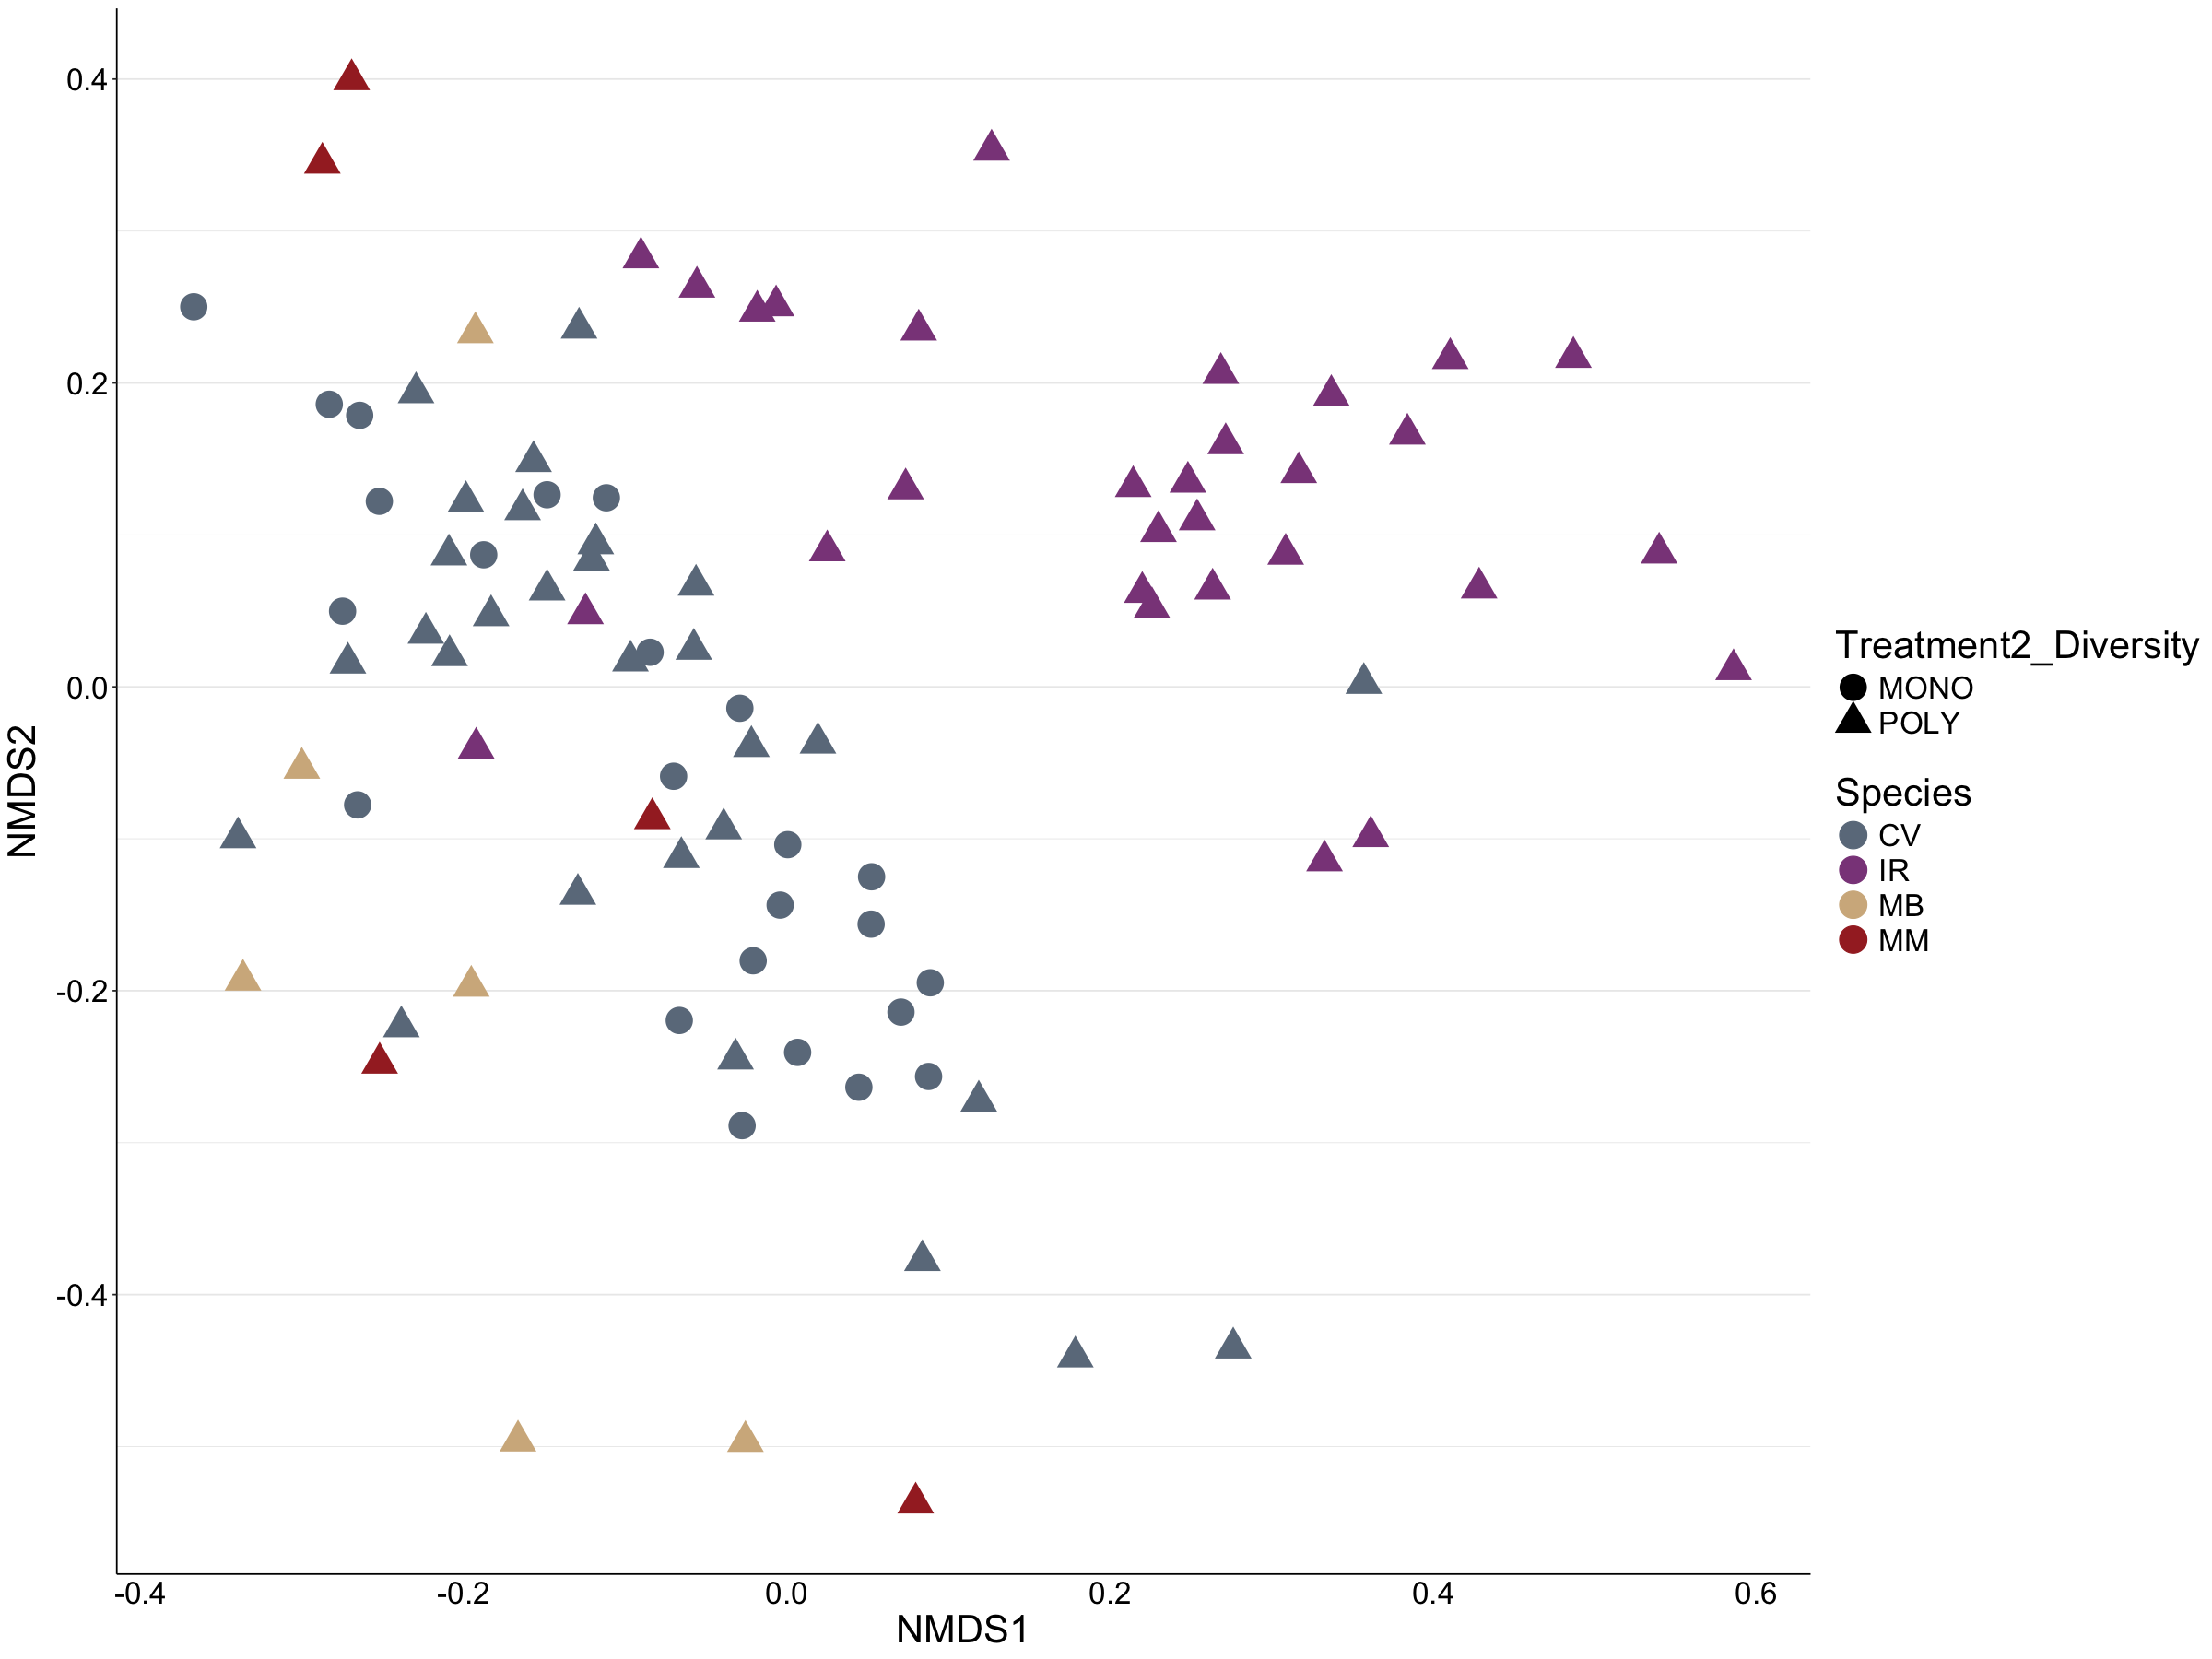

In [185]:
plot_ordination(DE, DE.ord, type="samples", color="Species", shape="Treatment2_Diversity")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
scale_color_manual(values=c("slategray4", "orchid4", "tan", "brown"))+
geom_point(size=8)+
theme_bw()+
#geom_text(mapping = aes(label = Number), size = 10) +
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))

In [186]:
ggsave(width=12, height=8, file="~/Documents/DE/DE_16S/DE18nMDS.pdf")

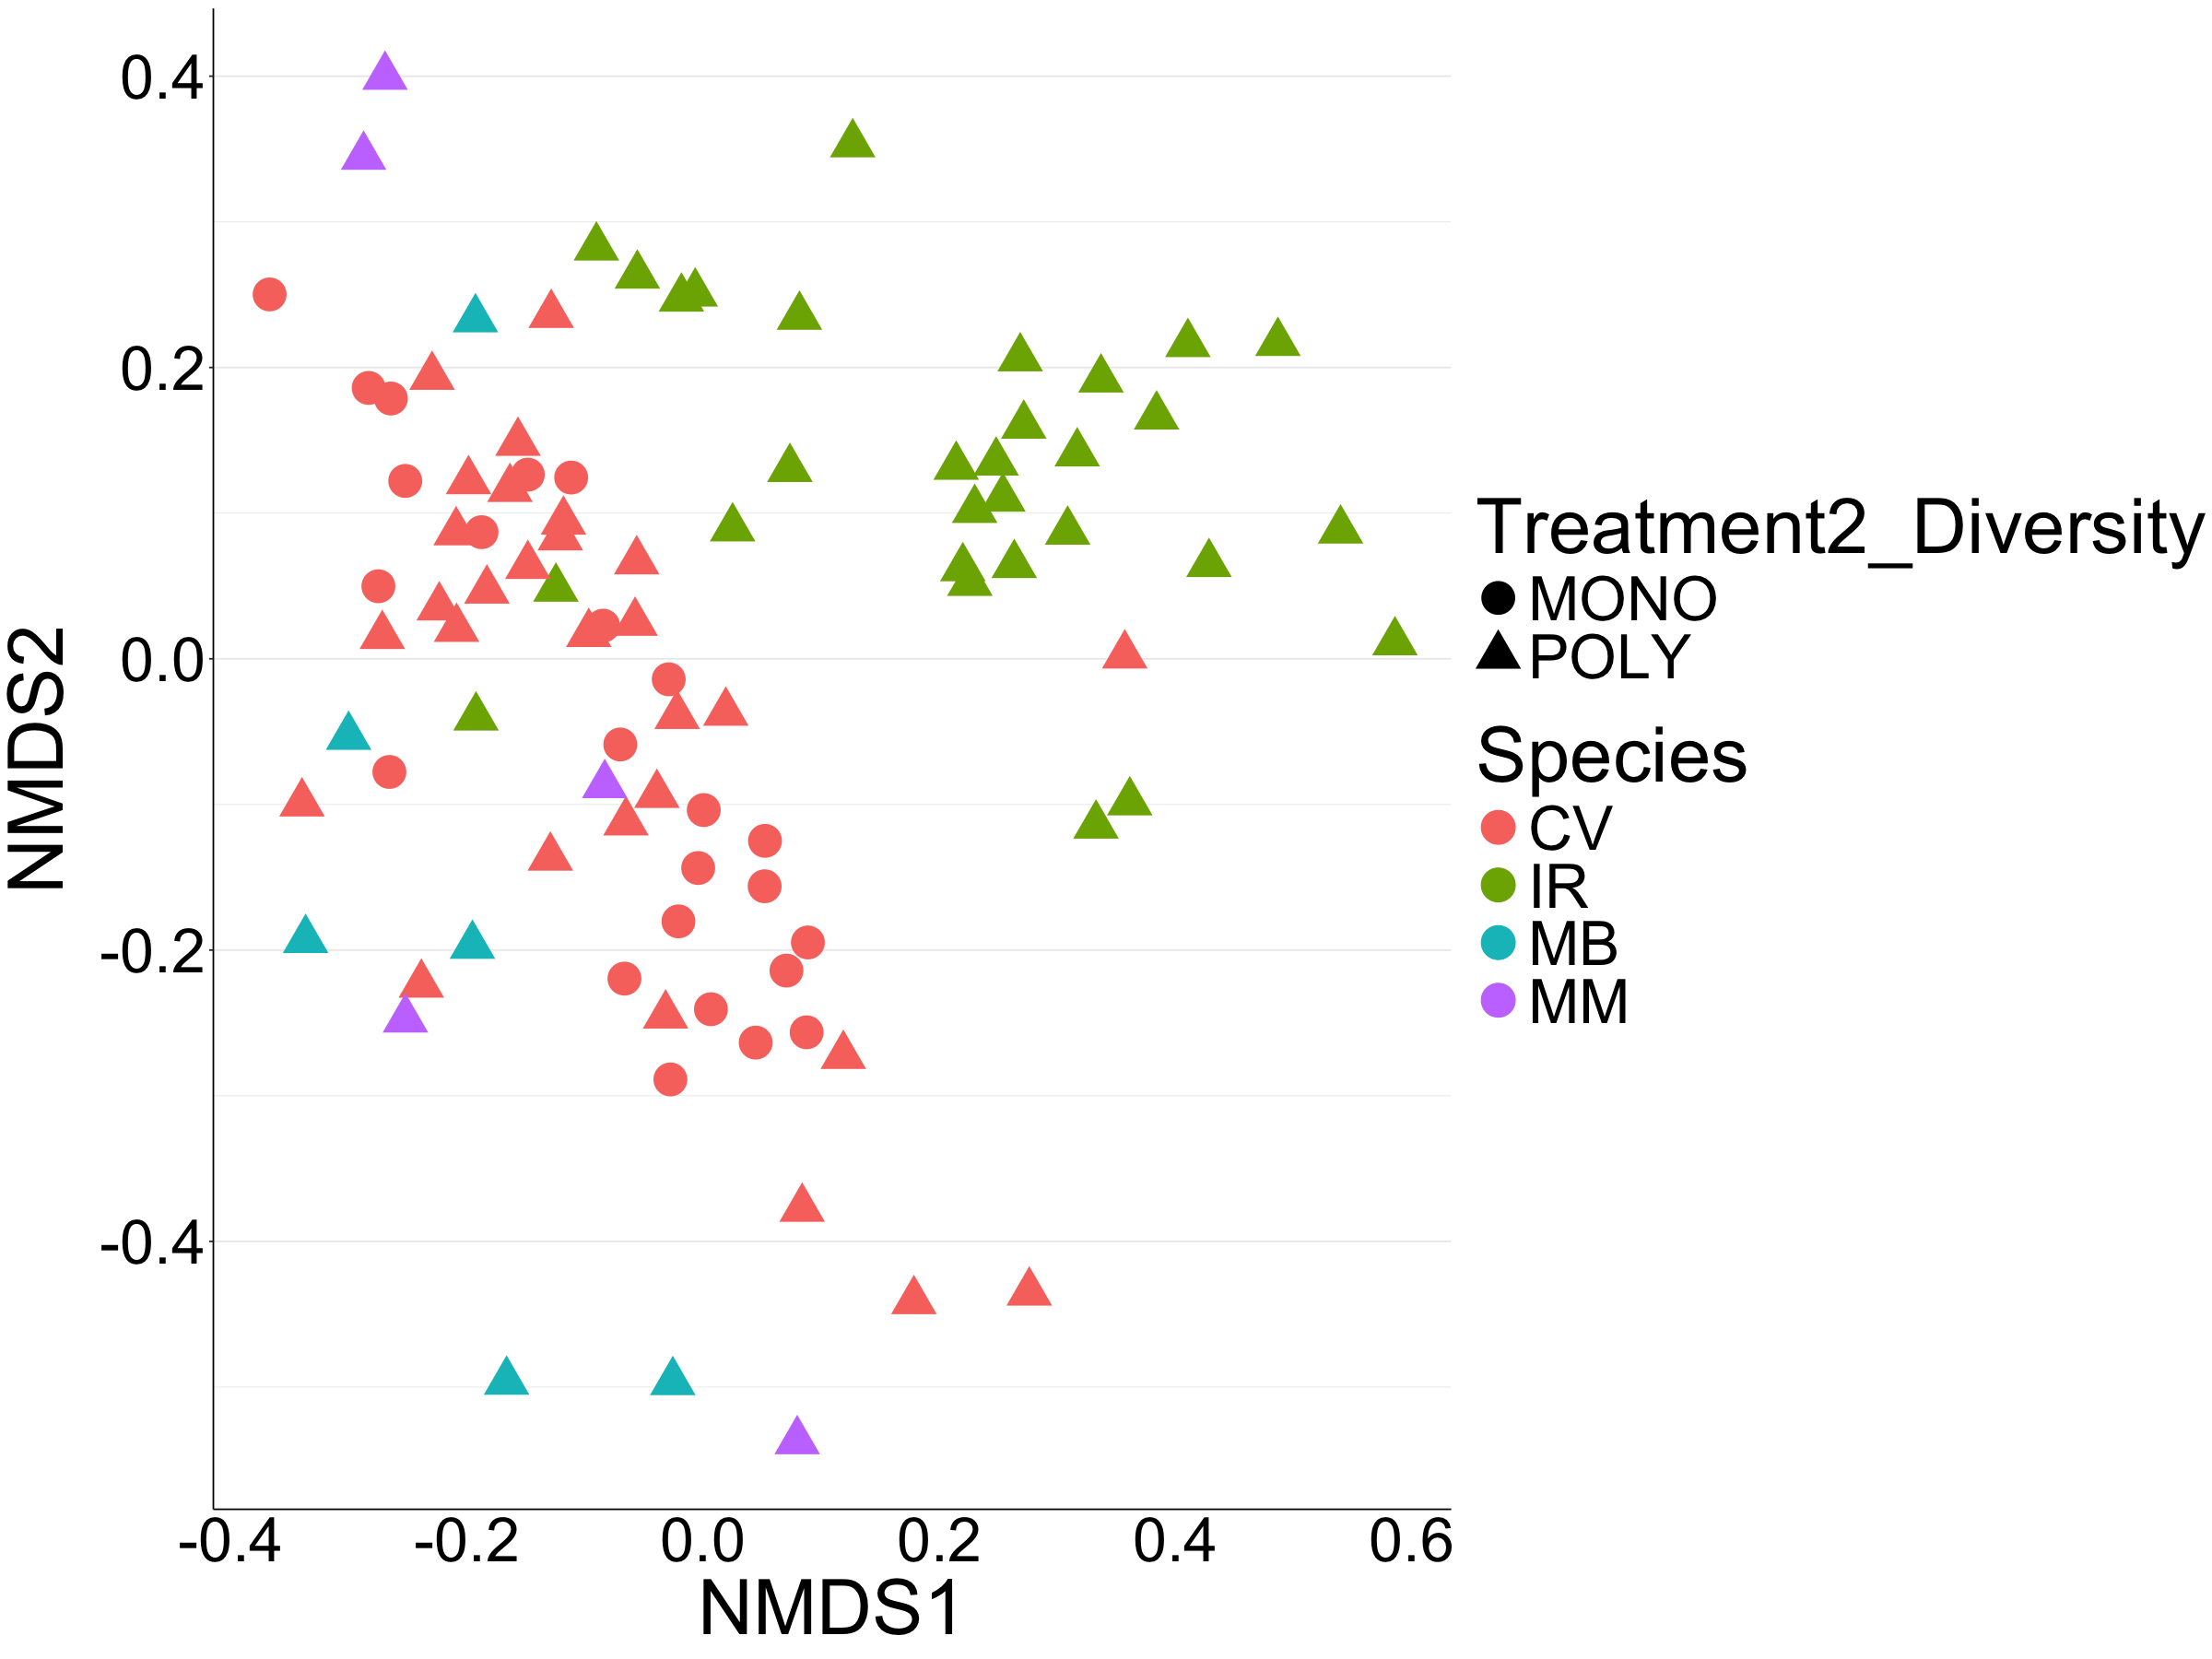

In [187]:
plot_ordination(DE, DE.ord, type="samples", color="Species", shape="Treatment2_Diversity")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=10)+
theme_bw()+
#geom_text(mapping = aes(label = Number), size = 10) +
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=50))

In [188]:
df = as(sample_data(DE), "data.frame")
d = dist(DE)
DEadonis = adonis2(d ~ Treatment1_Density+ Species/Treatment2_Diversity + Color_Bucket, df, permutations=999)
DEadonis

ERROR: Error in as.vector(data): no method for coercing this S4 class to a vector


In [189]:
# convert the sample_data() within a phyloseq object to a vegan compatible data object
pssd2veg <- function(physeq) {
  sd <- sample_data(physeq)
  return(as(sd,"data.frame"))
}

# convert the otu_table() within a phyloseq object to a vegan compatible data object
psotu2veg <- function(physeq) {
  OTU <- otu_table(physeq)
  if (taxa_are_rows(OTU)) {
    OTU <- t(OTU)
  }
  return(as(OTU, "matrix"))
}

In [190]:

CV = subset_samples(DE, Species=="CV")
IR= subset_samples(DE, Species=="IR")
clams= subset_samples(DE, Species%in%c("MM", "MB"))

In [191]:
DE

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7289 taxa and 94 samples ]
sample_data() Sample Data:       [ 94 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7289 taxa by 6 taxonomic ranks ]

In [192]:
DEsd=pssd2veg(DE)
DEotu=psotu2veg(DE)

In [193]:
adonis2(vegdist(DEotu, method="bray") ~ Species/Treatment2_Diversity+Species/Treatment1_Density, data=DEsd)

Df SumOfSqs   R2          F         Pr(>F)
Species                       3 10.0275875 0.304718783 13.616106 0.001 
Species:Treatment2_Diversity  1  0.2676012 0.008131877  1.090099 0.310 
Species:Treatment1_Density    4  1.7463922 0.053069446  1.778523 0.007 
Residual                     85 20.8660967 0.634079894        NA    NA 
Total                        93 32.9076776 1.000000000        NA    NA

In [194]:
CVsd=pssd2veg(CV)
CVotu=psotu2veg(CV)

In [195]:
adonis2(vegdist(CVotu, method="bray") ~ Treatment2_Diversity+Treatment1_Density, data=CVsd)

Df SumOfSqs   R2         F         Pr(>F)
Treatment2_Diversity  1  0.2676012 0.01835184 0.9623576 0.415 
Treatment1_Density    1  0.4106887 0.02816465 1.4769343 0.134 
Residual             50 13.9034171 0.95348351        NA    NA 
Total                52 14.5817070 1.00000000        NA    NA

In [196]:
IRsd=pssd2veg(IR)
IRotu=psotu2veg(IR)

In [197]:
adonis2(vegdist(IRotu, method="bray") ~ Treatment1_Density, data=IRsd)

Df SumOfSqs  R2         F         Pr(>F)
Treatment1_Density  1 0.1578979 0.02918557 0.8417634 0.602 
Residual           28 5.2522374 0.97081443        NA    NA 
Total              29 5.4101353 1.00000000        NA    NA

In [198]:
clamssd=pssd2veg(clams)
clamsotu=psotu2veg(clams)

In [199]:
adonis2(vegdist(clamsotu, method="bray") ~ Treatment1_Density, data=clamssd)

Df SumOfSqs  R2        F        Pr(>F)
Treatment1_Density  1 0.8625049 0.2736807 3.391244 0.01  
Residual            9 2.2889960 0.7263193       NA   NA  
Total              10 3.1515009 1.0000000       NA   NA

In [200]:
CVdds = phyloseq_to_deseq2(CV, ~ Treatment2_Diversity+Treatment1_Density)
gm_mean = function(row) if (all(row == 0)) 0 else exp(mean(log(row[row != 0])))
geoMeans = apply(CVotu, 1, gm_mean)
CVdds <- estimateSizeFactors(CVdds, geoMeans=geoMeans, locfunc=shorth)

CVdds = DESeq(CVdds, test="Wald", fitType="parametric")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


ERROR: Error in estimateSizeFactorsForMatrix(counts(object), locfunc = locfunc, : geoMeans should be as long as the number of rows of counts


In [116]:
resultsNames(CVdds)

[1] "Intercept"                         "Treatment2_Diversity_POLY_vs_MONO"
[3] "Treatment1_Density_LOW_vs_HIGH"

In [143]:
res = results(CVdds, cooksCutoff = FALSE, name="Treatment1_Density_LOW_vs_HIGH")
alpha = 0.05
sigCV = res[which(res$padj < alpha), ]
sigCV = cbind(as(sigCV, "data.frame"), as(tax_table(CV)[rownames(sigCV), ], "matrix"))
NROW(sigCV)

[1] 422

In [144]:
sigCVsimp=sigCV[,c("log2FoldChange", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus")] 
sigCVsimp <- as.matrix(sigCVsimp)
sigCVsimpTAX <- tax_table(sigCVsimp)
sigCVlog <- CV
tax_table(sigCVlog)=sigCVsimpTAX

In [145]:
sigCV_wlog_filter <- genefilter_sample(sigCVlog, filterfun_sample(function(x) x > 1), A=0.33*nsamples(sigCVlog))
sigCV_wlog_prune <- prune_taxa(sigCV_wlog_filter, sigCVlog)

In [146]:
##density
tax_table(sigCV_wlog_prune)

log2FoldChange
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG   2.136387    
TACGTAGGTCCCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGTCCGTAGACGGTTTATTAAGTCTGATGTGAAAGCCACCGGCTCAACCGGTGAAACGCATTAGATACTGGTAAACTAGAGTATGTTAGAGGATAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGGCTATCTGGGACATTACTGACGTTGAGGGACGAAAGCGTGGGGAGCGAACAGG  -4.815568    
                                                                                                                                                                                                                                                              Kingdom 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Bacteria
TACGTAGGTCCCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGTCCGTAGACGGTTTATTAAGTCTGATGTGAAAGCCACCGGCTCAACCGGTGAAACGCATTAGATACTGGTAAACTAGAGTATGTTAGAGGATAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGGCTATCTGGGACATTACTGACGTTGAGGGACGAAAGCGTGGGGAGCGAACAGG Bacteria
                                                                                                                                                                                                                                                              Phylum       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetota
TACGTAGGTCCCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGTCCGTAGACGGTTTATTAAGTCTGATGTGAAAGCCACCGGCTCAACCGGTGAAACGCATTAGATACTGGTAAACTAGAGTATGTTAGAGGATAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGGCTATCTGGGACATTACTGACGTTGAGGGACGAAAGCGTGGGGAGCGAACAGG Firmicutes   
                                                                                                                                                                                                                                                              Class       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetia
TACGTAGGTCCCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGTCCGTAGACGGTTTATTAAGTCTGATGTGAAAGCCACCGGCTCAACCGGTGAAACGCATTAGATACTGGTAAACTAGAGTATGTTAGAGGATAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGGCTATCTGGGACATTACTGACGTTGAGGGACGAAAGCGTGGGGAGCGAACAGG Bacilli     
                                                                                                                                                                                                                                                              Order          
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetales 
TACGTAGGTCCCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGTCCGTAGACGGTTTATTAAGTCTGATGTGAAAGCCACCGGCTCAACCGGTGAAACGCATTAGATACTGGTAAACTAGAGTATGTTAGAGGATAGTGGAATTCCATGTGTAGCGGTGAAATGCGTAGATATATGGAGGAACACCAGTGGCGAAGGCGGCTATCTGGGACATTACTGACGTTGAGGGACGAAAGCGTGGGGAGCGAACAGG Mycoplasmatales
                                                                                                                                                                                                                                                   

In [124]:
##diversity
tax_table(sigCV_wlog_prune)

log2FoldChange
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG   2.262024    
                                                                                                                                                                                                                                                              Kingdom 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Bacteria
                                                                                                                                                                                                                                                              Phylum       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetota
                                                                                                                                                                                                                                                              Class       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetia
                                                                                                                                                                                                                                                              Order         
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetales
                                                                                                                                                                                                                                                              Family         
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetaceae
                                                                                                                                                                                                                                                              Genus
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG NA

In [88]:
tax_table(sigCV_wlog_prune)

log2FoldChange
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG   3.201641    
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGTGTAGGCGGGTAAATAAGTCAGAAGTGAAATCCAATAGCTCAACTATTGAACTGCTTTTGAAACTGTATACCTAGAATGTGGGAGAGGCAGATGGAATTTCTGGTGTAGGGGTAAAATCCGTAGAGATCAGAAGGAATACCGATTGCGAAGGCGATCTGCTGGAACATTATTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG   4.024965    
                                                                                                                                                                                                                                                              Kingdom 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Bacteria
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGTGTAGGCGGGTAAATAAGTCAGAAGTGAAATCCAATAGCTCAACTATTGAACTGCTTTTGAAACTGTATACCTAGAATGTGGGAGAGGCAGATGGAATTTCTGGTGTAGGGGTAAAATCCGTAGAGATCAGAAGGAATACCGATTGCGAAGGCGATCTGCTGGAACATTATTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG Bacteria
                                                                                                                                                                                                                                                              Phylum          
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetota   
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGTGTAGGCGGGTAAATAAGTCAGAAGTGAAATCCAATAGCTCAACTATTGAACTGCTTTTGAAACTGTATACCTAGAATGTGGGAGAGGCAGATGGAATTTCTGGTGTAGGGGTAAAATCCGTAGAGATCAGAAGGAATACCGATTGCGAAGGCGATCTGCTGGAACATTATTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG Campilobacterota
                                                                                                                                                                                                                                                              Class          
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetia   
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGTGTAGGCGGGTAAATAAGTCAGAAGTGAAATCCAATAGCTCAACTATTGAACTGCTTTTGAAACTGTATACCTAGAATGTGGGAGAGGCAGATGGAATTTCTGGTGTAGGGGTAAAATCCGTAGAGATCAGAAGGAATACCGATTGCGAAGGCGATCTGCTGGAACATTATTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG Campylobacteria
                                                                                                                                                                                                                                                              Order            
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetales   
TACGGAGGGTGCAAGCGTTACTCGGAATCACTGGGCGTAAAGAGCGTGTAGGCGGGTAAATAAGTCAGAAGTGAAATCCAATAGCTCAACTATTGAACTGCTTTTGAAACTGTATACCTAGAATGTGGGAGAGGCAGATGGAATTTCTGGTGTAGGGGTAAAATCCGTAGAGATCAGAAGGAATACCGATTGCGAAGGCGATCTGCTGGAACATTATTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG Campylobacterales
                                                                                                                                                                                                                           

## what is the core microbiome

In [201]:
CV_mono = subset_samples(DE, Species%in%c("CV")& Treatment2_Diversity %in%c("MONO"))
CV_poly = subset_samples(DE, Species%in%c("CV")& Treatment2_Diversity %in%c("POLY"))
IR = subset_samples(DE, Species%in%c("IR"))
MB = subset_samples(DE, Species%in%c("MB"))
MM = subset_samples(DE, Species%in%c("MM"))

In [202]:
IR

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7289 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7289 taxa by 6 taxonomic ranks ]

In [205]:
#what otus are present in every mussel?
flist= filterfun(kOverA(30, 0))
IR_all=phyloseq::filter_taxa(IR, flist, TRUE )
tax_table(IR_all)

Kingdom 
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Bacteria
                                                                                                                                                                                                                                                              Phylum       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetota
                                                                                                                                                                                                                                                              Class       
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetia
                                                                                                                                                                                                                                                              Order         
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetales
                                                                                                                                                                                                                                                              Family         
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG Spirochaetaceae
                                                                                                                                                                                                                                                              Genus
TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG NA

In [207]:
CV

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7289 taxa and 53 samples ]
sample_data() Sample Data:       [ 53 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7289 taxa by 6 taxonomic ranks ]

In [210]:
#what otus are present in every oyster?
flist= filterfun(kOverA(53, 0))
CV_all=phyloseq::filter_taxa(CV, flist, TRUE )
tax_table(CV_all)

Kingdom 
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Bacteria
                                                                                                                                                                                                                                                                Phylum       
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetota
                                                                                                                                                                                                                                                                Class       
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetia
                                                                                                                                                                                                                                                                Order         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetales
                                                                                                                                                                                                                                                                Family         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetaceae
                                                                                                                                                                                                                                                                Genus
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG NA

In [211]:
MM

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7289 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7289 taxa by 6 taxonomic ranks ]

In [213]:
#what otus are present in every MM?
flist= filterfun(kOverA(5, 0))
MM_all=phyloseq::filter_taxa(MM, flist, TRUE )
tax_table(MM_all)

Kingdom 
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Bacteria
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG   Bacteria
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG   Bacteria
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG   Bacteria
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGCCTTTTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGGAAGGCTTGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG   Bacteria
GACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGATTAGTAAGTTGGGAGTGAAAGCCCGGGGCTTAACCTCGGAACTGCTTTCAAAACTGCTAGTCTTGAGTGAAGTAGGGGATGATGGAATTCCTAGTGTAGAGGTGAAATTCTTAGATATTAGGAGGAACACCGGTGGCGAAGGCGGTCATCTGGACTTCAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAGG   Bacteria
                                                                                                                                                                                                                                                                Phylum         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetota  
GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG   Cyanobacteria  
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGTCTTGTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGTAAGACTAGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG   Cyanobacteria  
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG   Planctomycetota
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGCCTTTTAAGTCTGTTGTTAAAGCGTGGAGCTTAACTCCATTTCAGCAATGGAAACTGGAAGGCTTGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATAACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG   Cyanobacteria  
GACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGATTAGTAAGTTGGGAGTGAAAGCCCGGGGCTTAACCTCGGAACTGCTTTCAAAACTGCTAGTCTTGAGTGAAGTAGGGGATGATGGAATTCCTAGTGTAGAGGTGAAATTCTTAGATATTAGGAGGAACACCGGTGGCGAAGGCGGTCATCTGGACTTCAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACAGG   Proteobacteria 
                                                                                                                                                                                                                                                                Class              
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTG

In [19]:
MB

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7294 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7294 taxa by 6 taxonomic ranks ]

In [21]:
#what otus are present in every MB?
flist= filterfun(kOverA(6, 0))
MB_all=filter_taxa(MB, flist, TRUE )
tax_table(MB_all)

Kingdom 
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Bacteria
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG   Bacteria
                                                                                                                                                                                                                                                                Phylum         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetota  
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG   Planctomycetota
                                                                                                                                                                                                                                                                Class         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetia  
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG   Planctomycetes
                                                                                                                                                                                                                                                                Order         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetales
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG   Pirellulales  
                                                                                                                                                                                                                                                                Family         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetaceae
GACGAACCGTACAAACGTTACTCGGAATTACTGGGCTTAAAGGGTGCGTAGGCTGCGCGGAAAGTTGGGTGTGAAAGCCCTCGGCTCAACCGAGGAATTGCATCCAAAACTACCGTGCTGGAGGGAGACAGAGGTAAGCGGAACTCAAGGTGGAGCGGTGAAATGCGTTGATATCTTGAGGAACACCGGTGGCGAAAGCGGCTTACTGGGTCTCTTCTGACGCTGAGGCACGAAAGCTAAGGTAGCAAACGGG   Pirellulaceae  
                                                                                                                                                                                                           

In [80]:
CV_mono

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7294 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 7294 taxa by 6 taxonomic ranks ]

In [36]:
#what otus are absent from monoculture oysters
CV_mono_0=filter_taxa(CV_mono, function(x) sum(x) == 0, TRUE)
CV_mono_0
absentOTUs=taxa_names(CV_mono_0)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3850 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 3850 taxa by 6 taxonomic ranks ]

In [286]:
CV_poly_mono0=prune_taxa(absentOTUs, CV_poly)
CV_poly_mono0

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3850 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 3850 taxa by 6 taxonomic ranks ]

In [304]:
IR_mono0=prune_taxa(absentOTUs, IR)


In [315]:
IRCV_poly_mono0=merge_phyloseq(IR_mono0, CV_poly_mono0)

In [316]:
IRCV_poly_mono0_100 = prune_taxa(names(sort(taxa_sums(IRCV_poly_mono0),TRUE)[1:100]), IRCV_poly_mono0)


In [323]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(119)

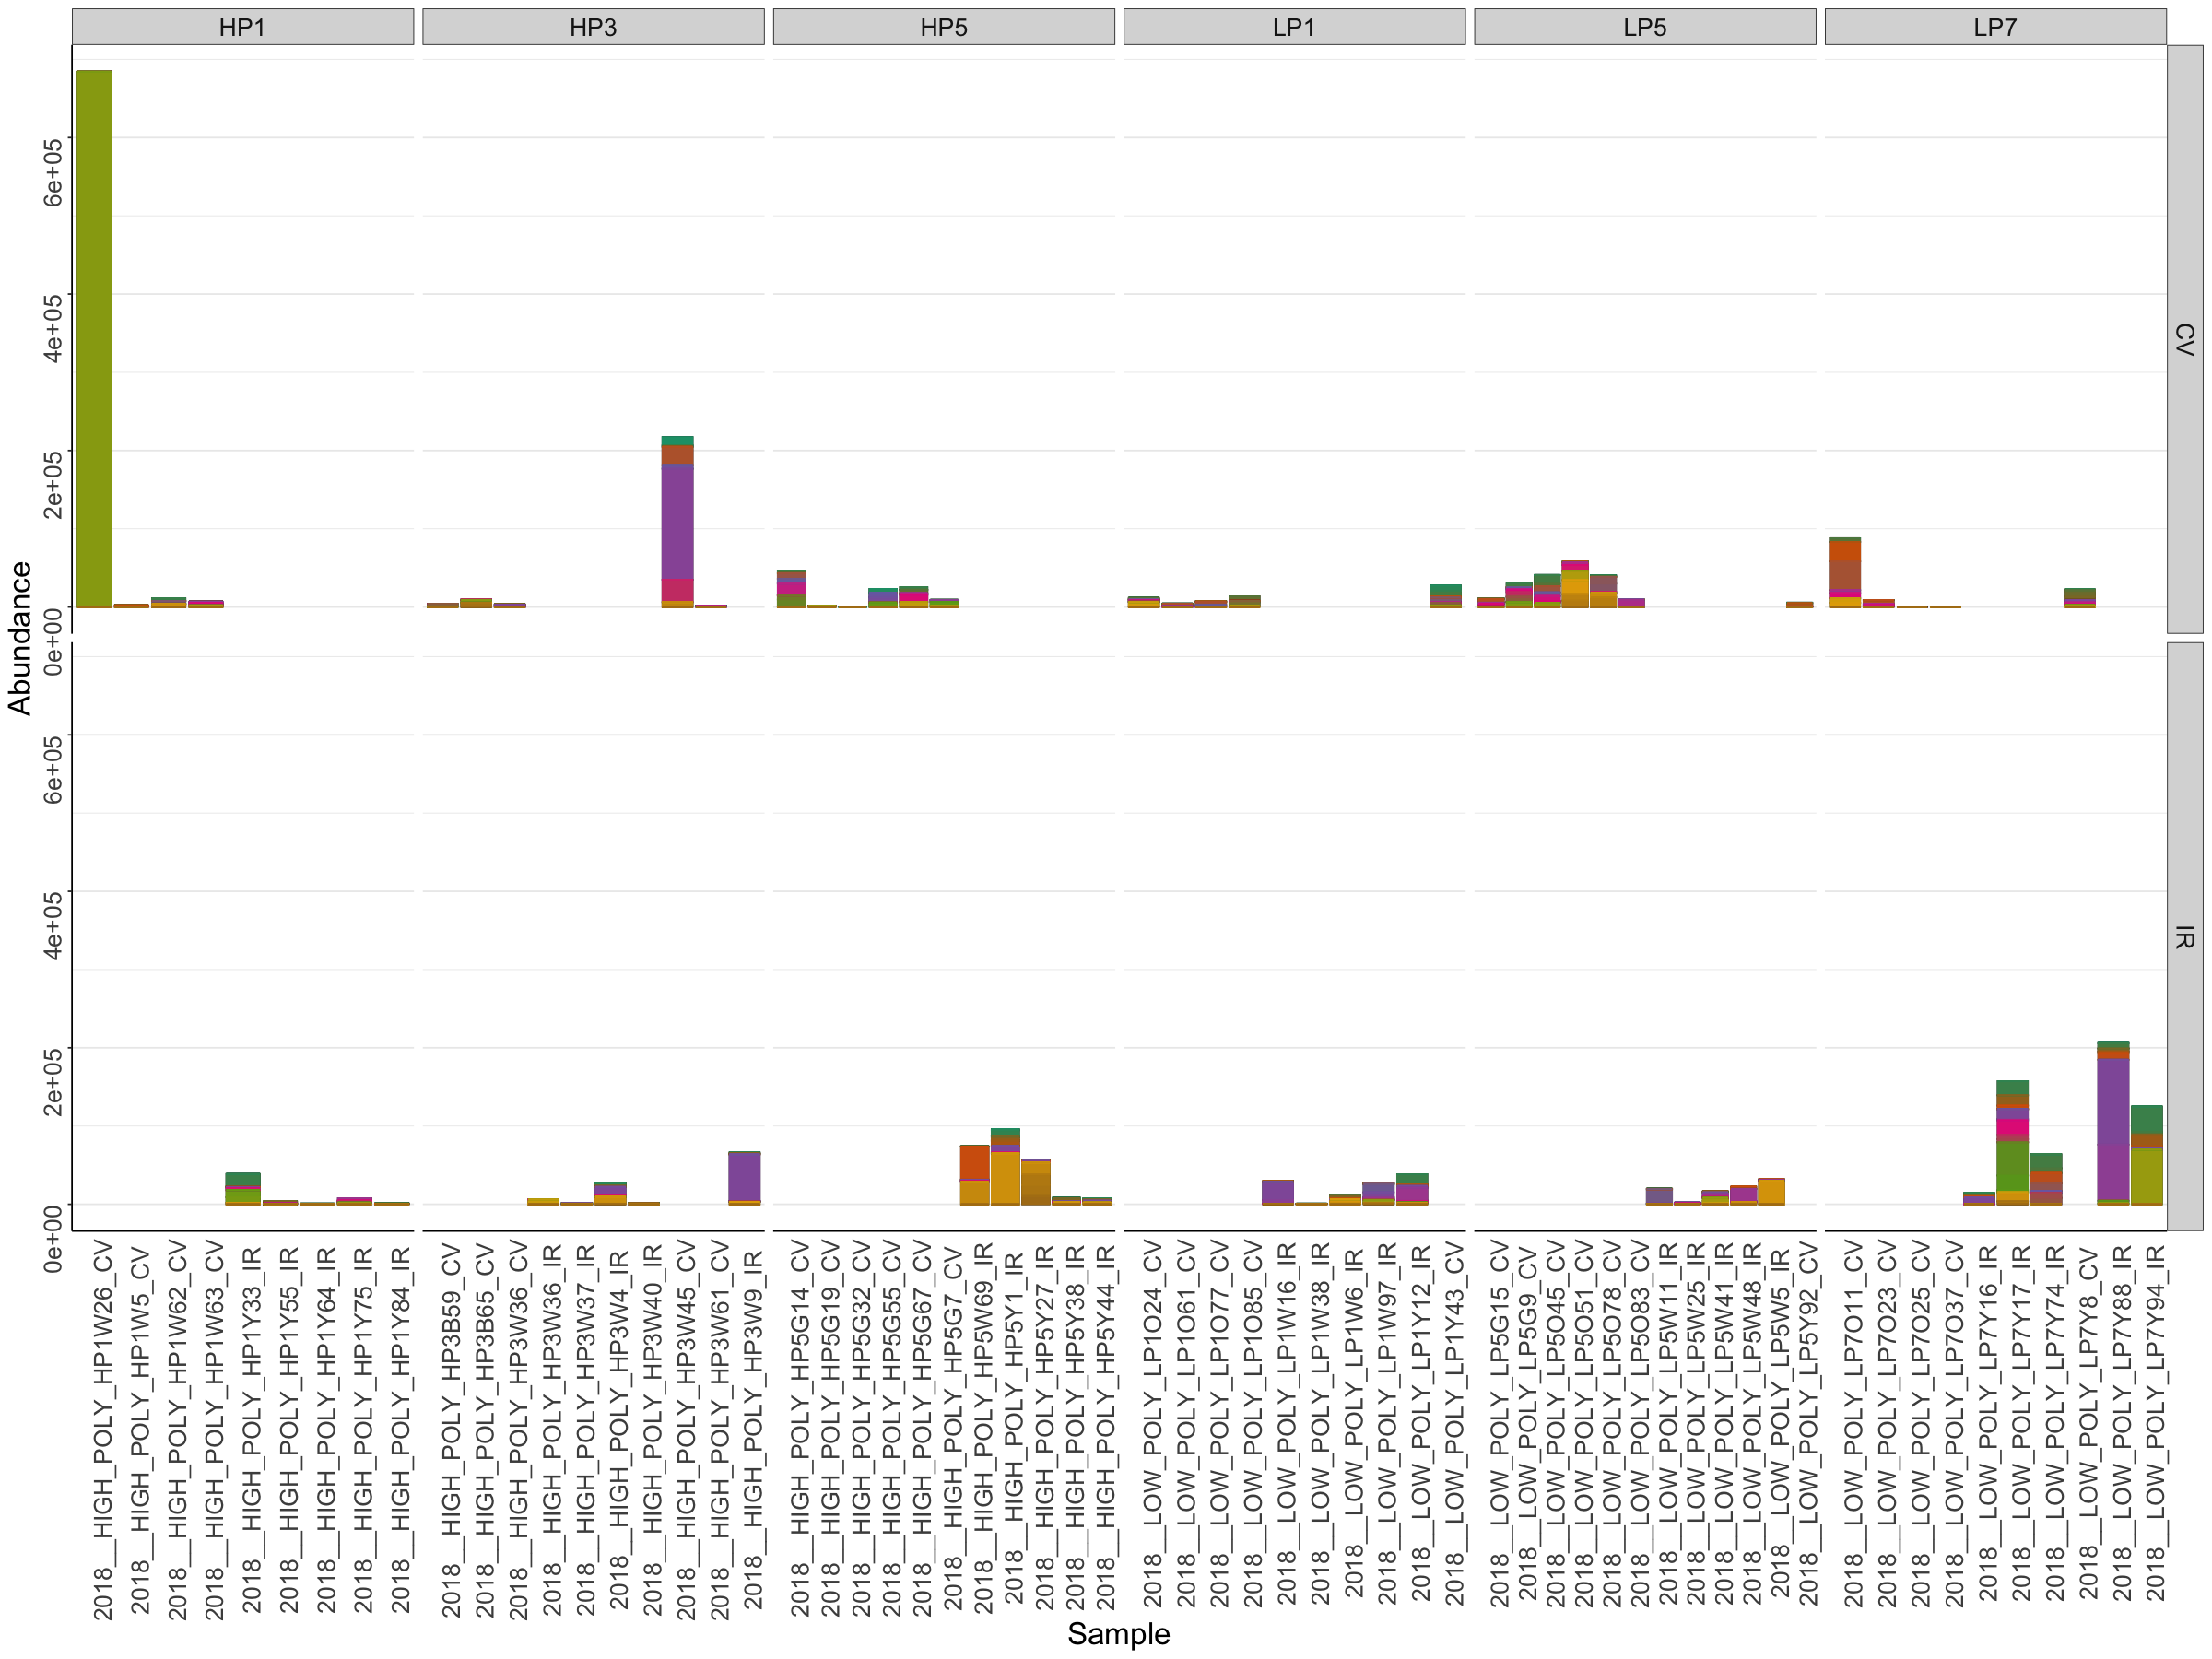

In [325]:
plot_bar(IRCV_poly_mono0_100,  fill="OTU") +
geom_bar(aes(color=OTU, fill=OTU), stat="identity", position="stack")+
facet_grid(Species~Color_Bucket, scales="free_x")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [113]:
#what otus are present in every polyculture oyster?
flist= filterfun(kOverA(32, 0))
CV_poly_all=filter_taxa(CV_poly, flist, TRUE )
tax_table(CV_poly_all)

Kingdom 
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Bacteria
                                                                                                                                                                                                                                                                Phylum       
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetota
                                                                                                                                                                                                                                                                Class       
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetia
                                                                                                                                                                                                                                                                Order         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetales
                                                                                                                                                                                                                                                                Family         
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG Spirochaetaceae
                                                                                                                                                                                                                                                                Genus
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG NA

Spirochete

In [116]:
#what otus are present in all monoculture oyster?
flist= filterfun(kOverA(26, 0))
CV_mono_all=filter_taxa(CV_mono, flist, TRUE )
otu_table(CV_mono_all)

2018__HIGH_MONO_HM1O73_CV
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          725644.92                
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG  23065.25                
                                                                                                                                                                                                                                                                                                                                                                                                                                         2018__HIGH_MONO_HM1W15_CV
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          51998.448                
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG  1358.168                
                                                                                                                                                                                                                                                                                                                                                                                                                                         2018__HIGH_MONO_HM1W33_CV
TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG                                                                                                                                                                          901623.377               
TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG   4220.779               
                                                                                                                                                                                                                                                                                                                                                                              

## Just look at Spirochetes

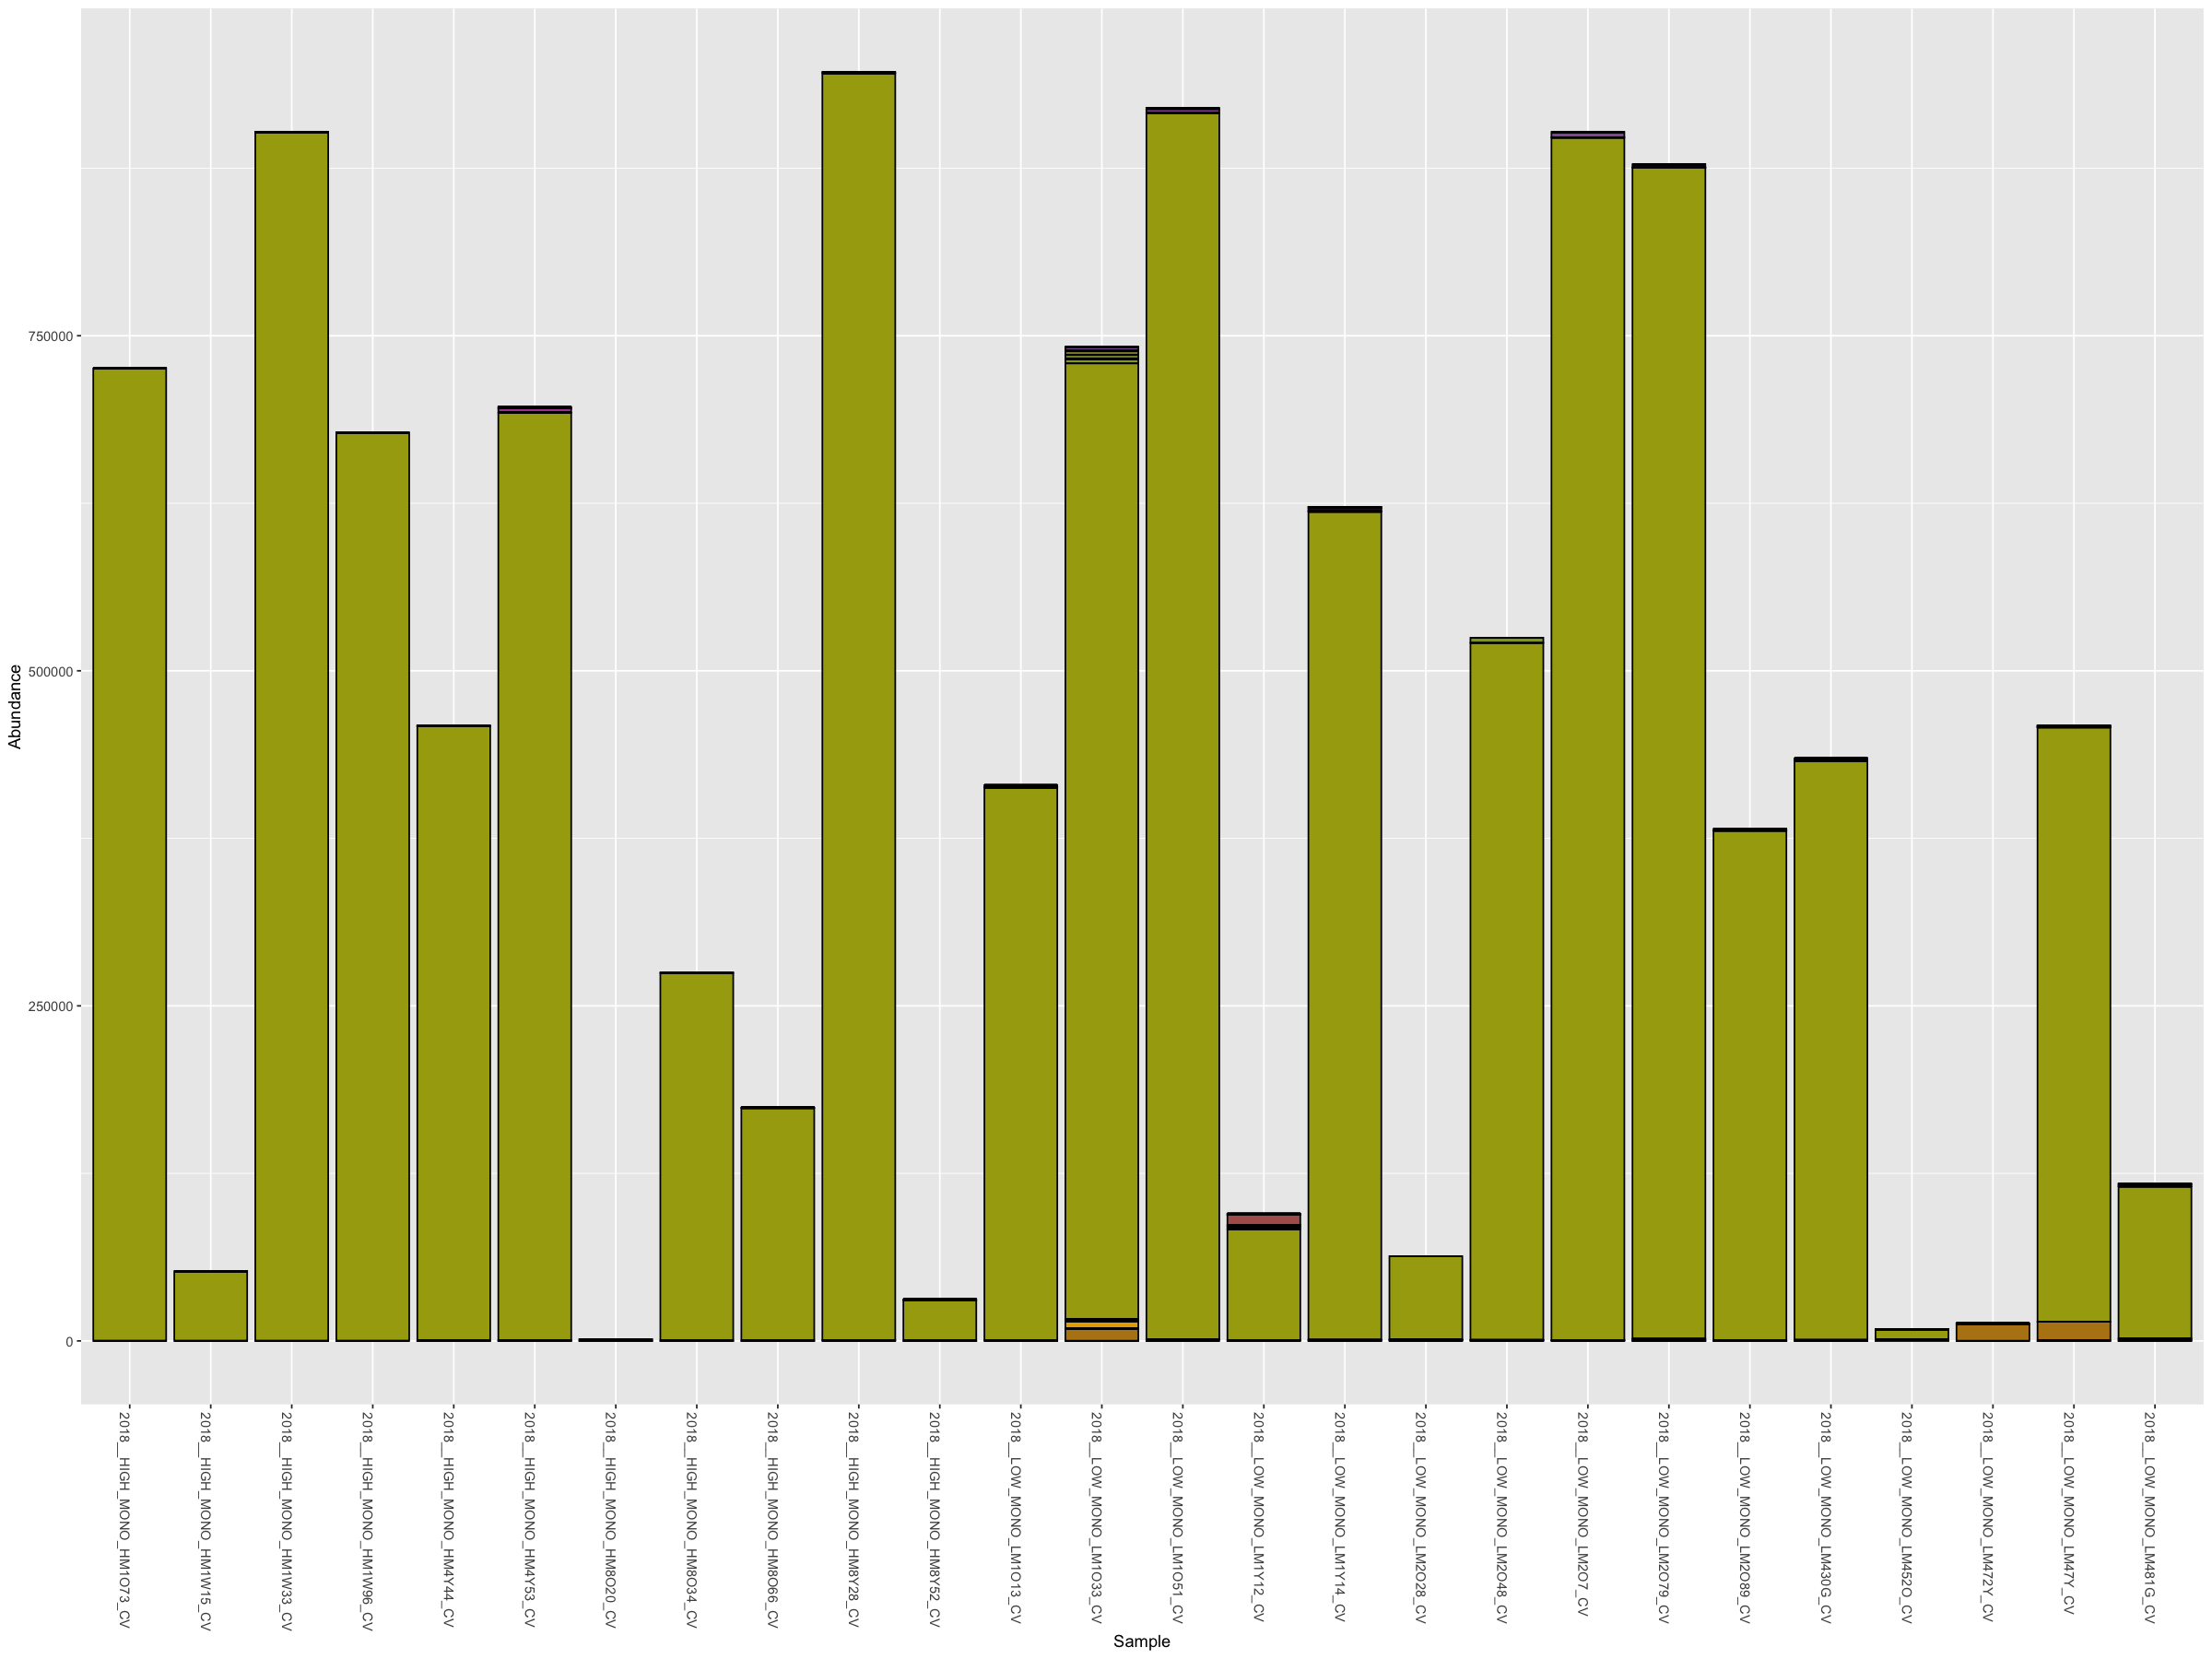

In [161]:
CV_mono_Spiro = subset_taxa(CV_mono, Phylum=="Spirochaetota")
plot_bar(CV_mono_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

In [3]:
CV_poly_Spiro = subset_taxa(CV_poly, Phylum=="Spirochaetota")
plot_bar(CV_poly_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

ERROR: Error in subset_taxa(CV_poly, Phylum == "Spirochaetota"): could not find function "subset_taxa"


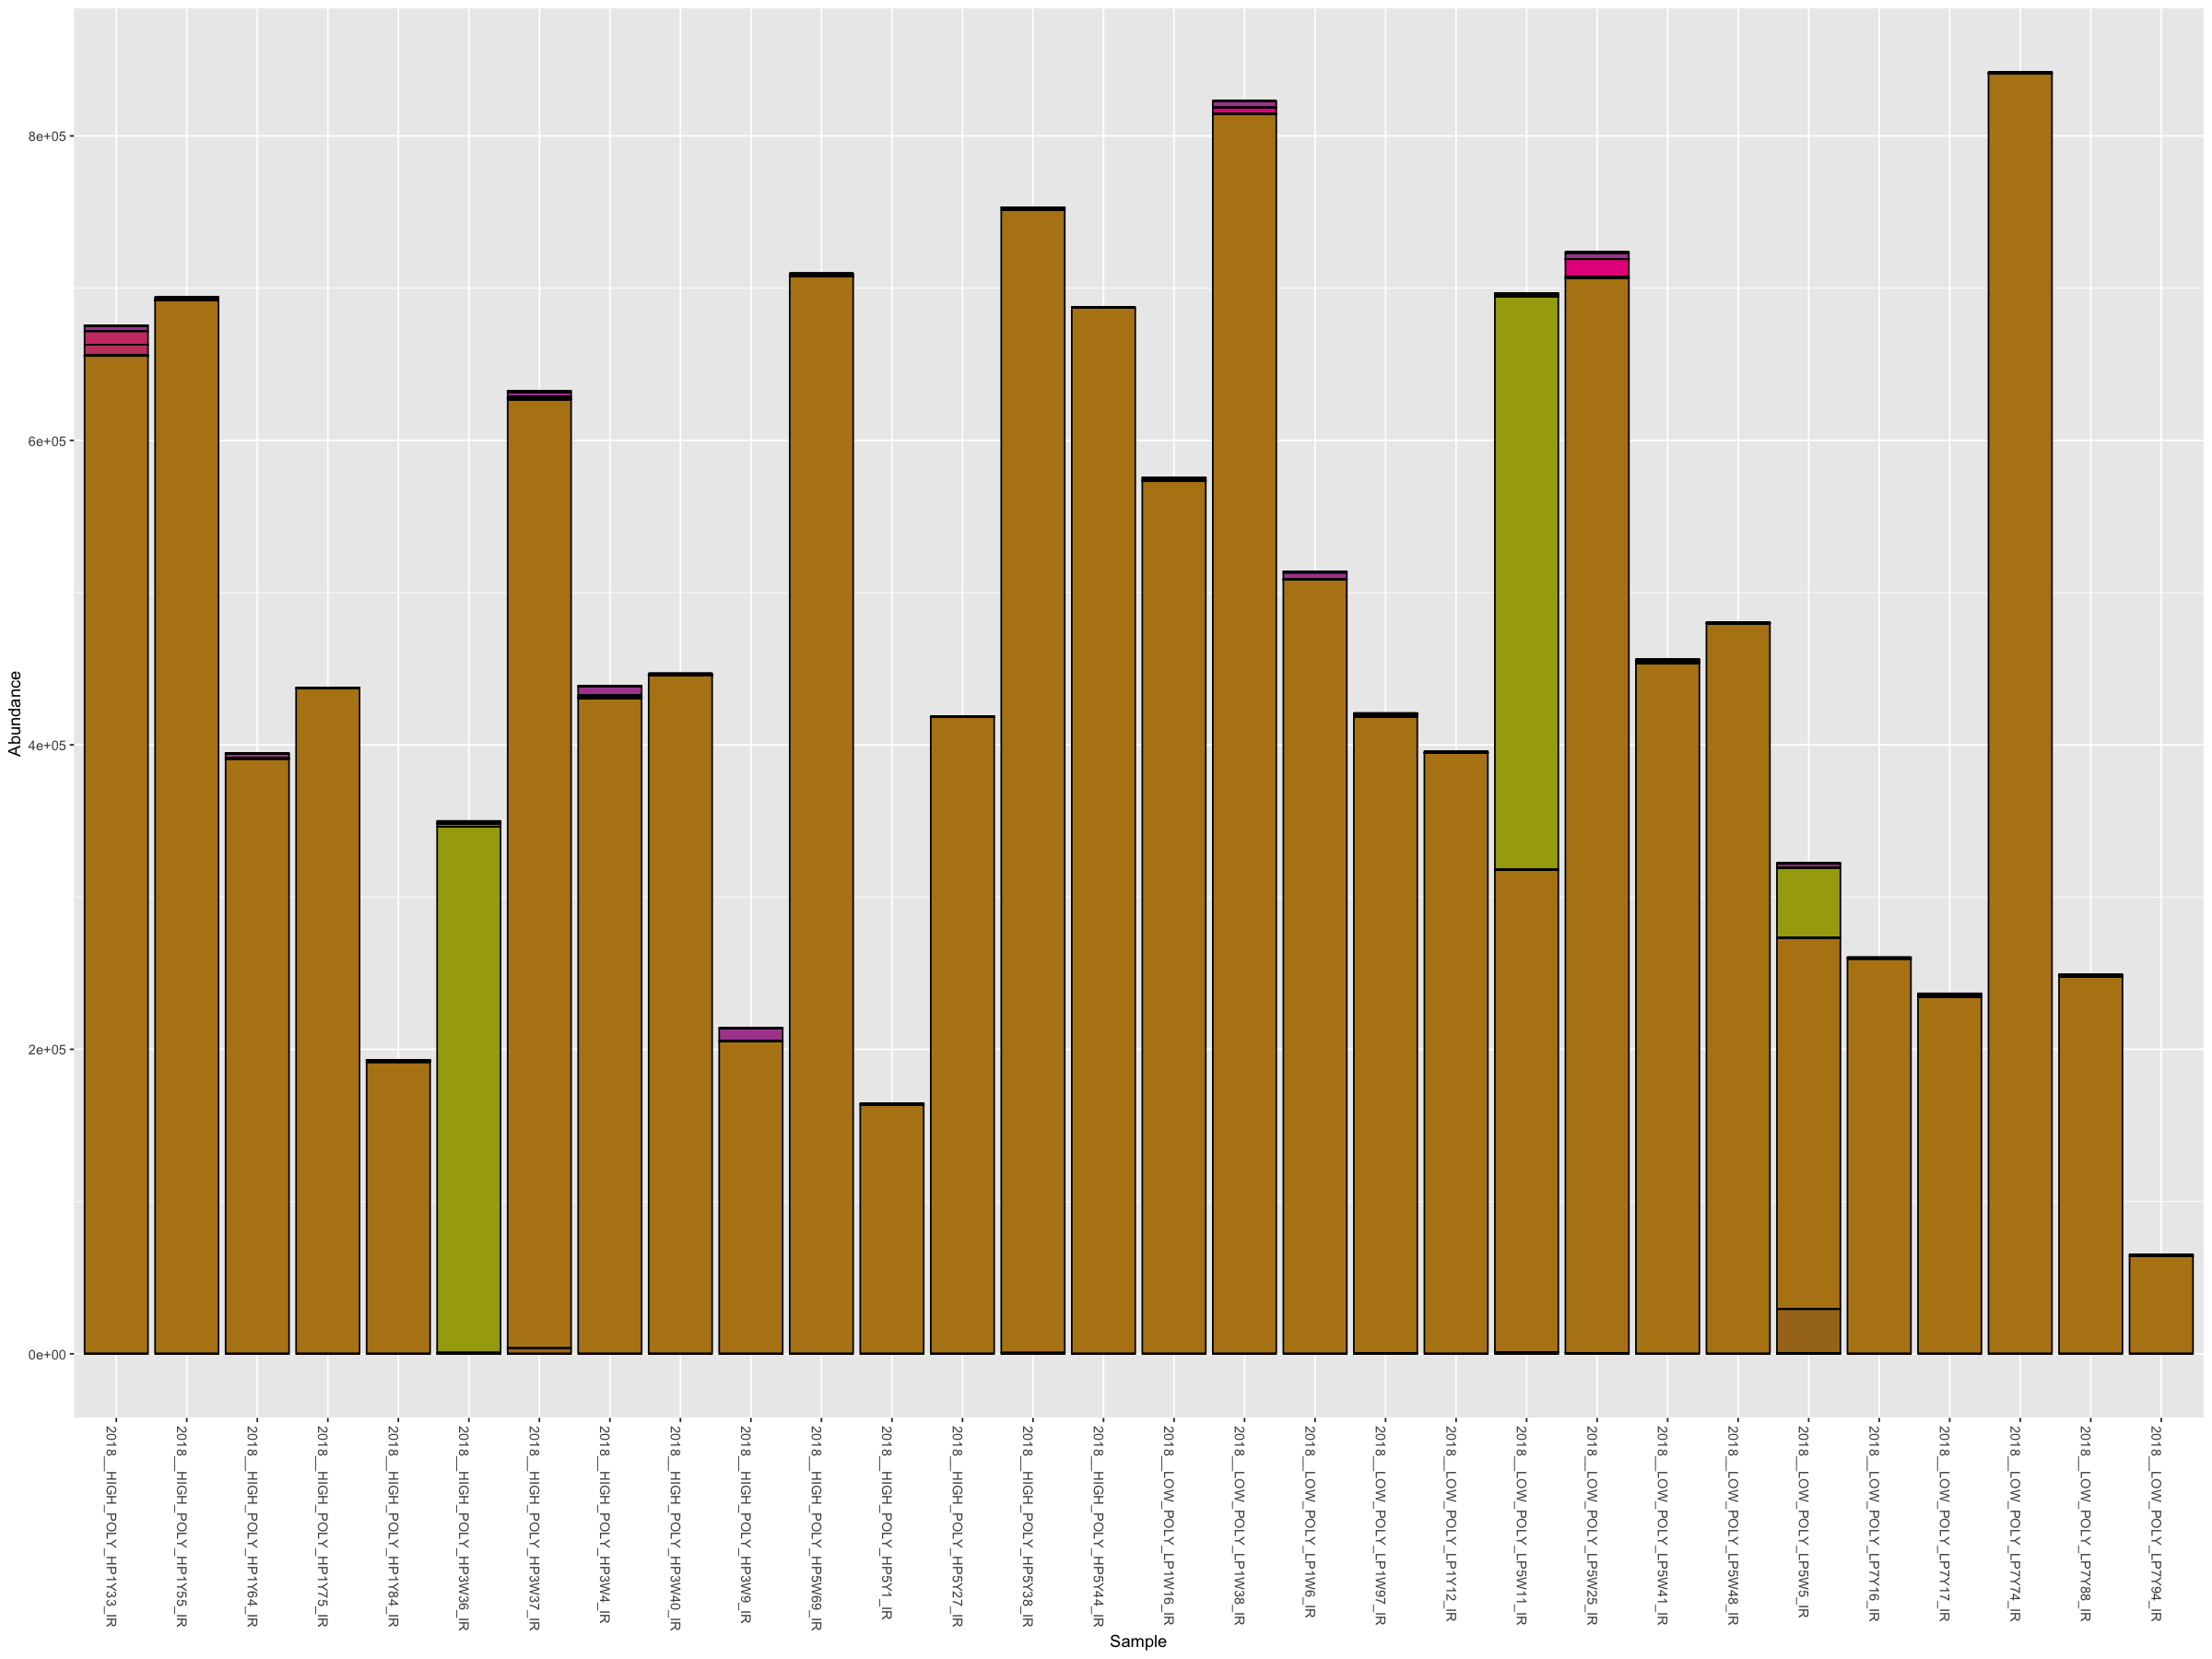

In [160]:
IR_Spiro = subset_taxa(IR, Phylum=="Spirochaetota")
plot_bar(IR_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

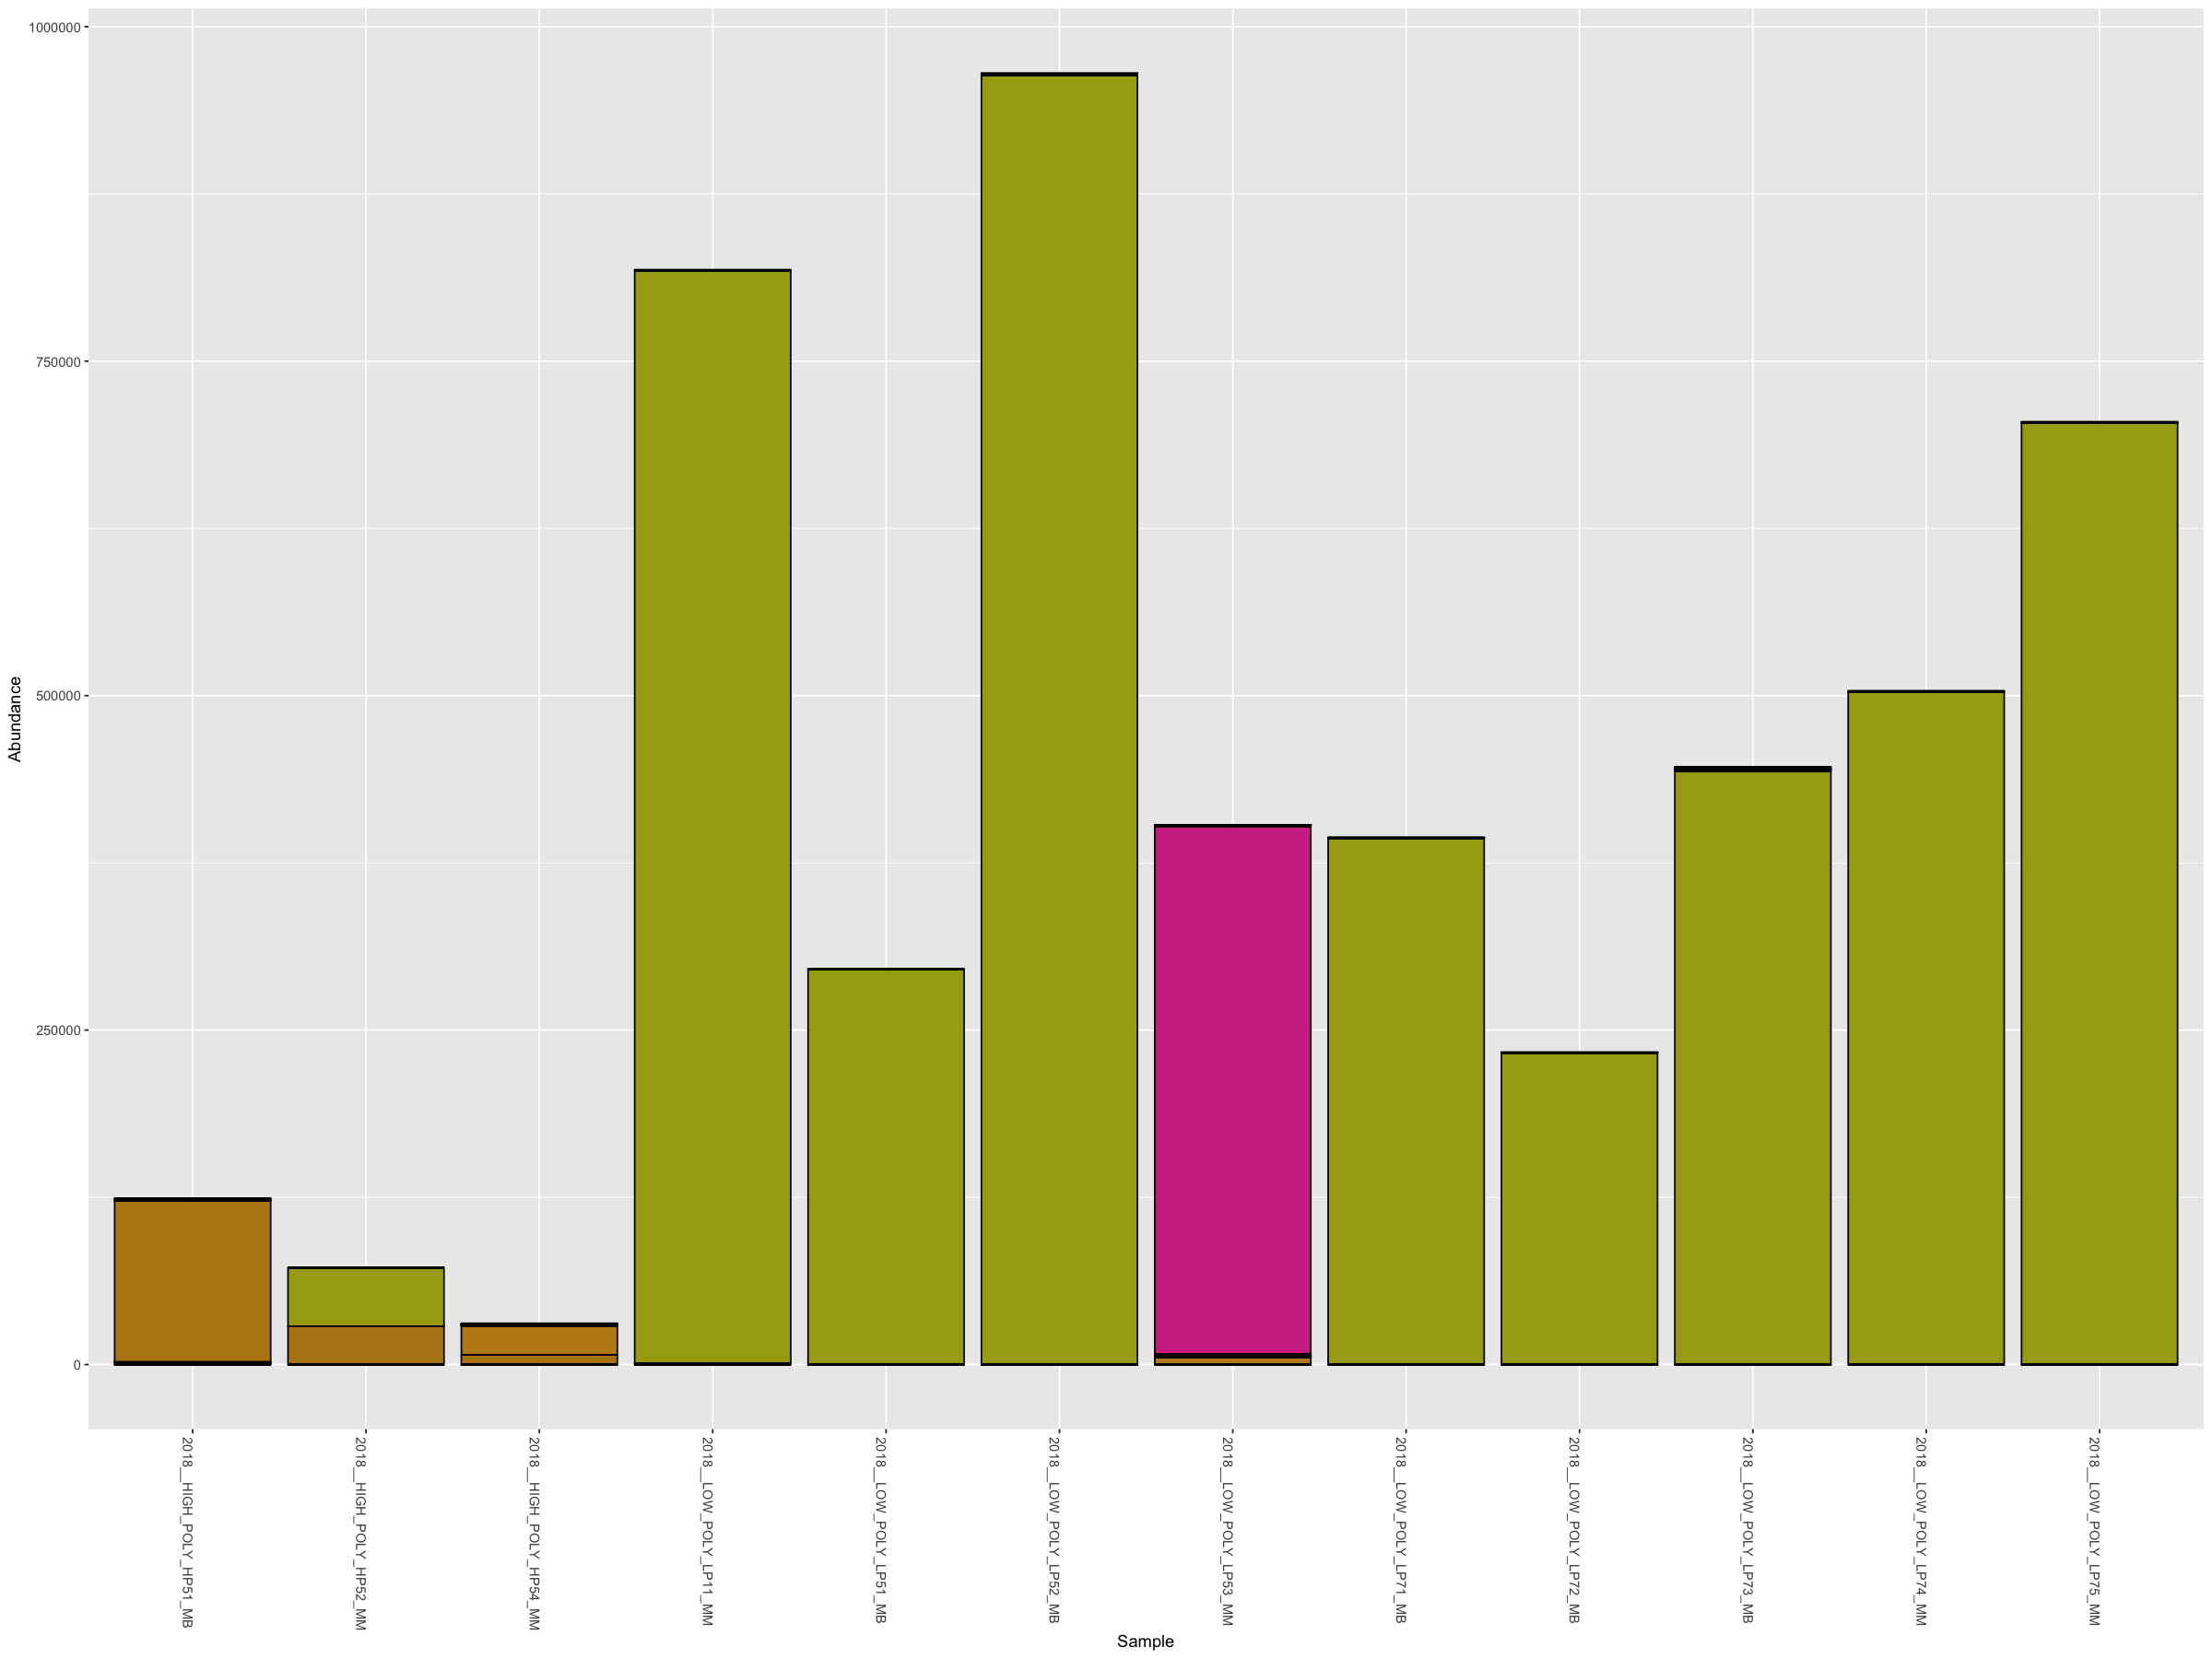

In [163]:
M_Spiro = subset_taxa(M, Phylum=="Spirochaetota")
plot_bar(M_Spiro, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme(legend.position = "none")

In [28]:
Spiro_all = subset_taxa(DE, Phylum=="Spirochaetota")

Spiro_allf = filter_taxa(Spiro_all, function(x) mean(x) > 100, TRUE)

In [38]:
taxa_names(Spiro_allf)

[1] "TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"                  
[2] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATCCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                    
[3] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTTAAGTAAGTTAATGATAAAAGACCGTGGCTCAACCACGGAAATGTTGTTAATACTGCTTGACTAGAATTTTTGATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                  
[4] "TACGTAAGGAGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGTGCGTGCAGGCTGTTTATTAAGTCTGATGTGAAAGTGCACAGCTTAACTGTGTTGTTGCGTTGGAAACTGGTAAACTAGAATTCGAGAGAGGAAATTGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAAGAACACCTGAGGCGAAAGCGAATTTCTGGCTCTGAATTGACGCTGTAGCGCGAAAGCGTAGGGAGCAAACAGG"                    
[5] "TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGCATGTAGGTGGTAAGATAAGCTTGGAGTAAAAGACCGCAGCTCAACTGCGGAGAGCGTTGAGAACTGTCTTACTAGAGTCTAGGAGAGGAAGCTGGAATTCTTGGAGGAGGGGTGAAATCTGTAGATCCCAAGGAGAACACCAGAGGCGAAGGCGAGCTTCTGGCCATAGACTGACACTGAGATGCGAAAGCGTGGGTAGCGAACAGG"                     
[6] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCGGTCAAGTAAGTTAATAATTAAAGACCATGGCTCAACCATGGGAATGTTGTTGATACTGCTTAACTAGAATTTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCGAAGGCGAAGGCAAGCTACTGGGTAAAGATTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                  
[7] "TACGTATGGGGCAAACGTTGTTCGGATTCACTGGGCGTAAAGAGTACGTAGGCTGTCGAGACAGTCAATGATCAAATTCCGTAGCTTAACTACGTGGTCGTTGTTGATACTACTCGACTAGAGTTTTATAGAGGTAGCGGGAATTCCTGGTGTAGGGGTGAAATCTGTTGATATCAGGAGGAACACCAAAGGCGAAGGCAAGCTACTGGGTAAAAACTGACGCTGAGGTACGAAAGCCAGGGGAGCAAATGGG"                    
[8] "GTGTCAGCAGCGCGGTCATACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG"
[9] "TACGTAAGGGGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTACGTAGGCGGATAAGTAGGCATTAAGATAAAGGTCGTAGCTCAACTACGGTGTATTTTAATGAACCACTTATCTAGAGTTATAGAGAGGGAACTGGAATTCCTGGTGTAAGGGTGAAATCTGTAGATATCAGGAAGAACATCAGTGGCGAAGGCGAGTTTCTGGCTAATAACTGACGCTGAGGTACGAAAGCATGGGGAGCGAACGGG"

In [50]:
mycolors= c('#1B9E77','#847B36','#CD6015','#966A77','#CD3893','#8E60A9','#BC5266','#74982A','#9EA811','#E6AB02')

In [51]:
mycolors

[1] "#1B9E77" "#847B36" "#CD6015" "#966A77" "#CD3893" "#8E60A9" "#BC5266"
 [8] "#74982A" "#9EA811" "#E6AB02"

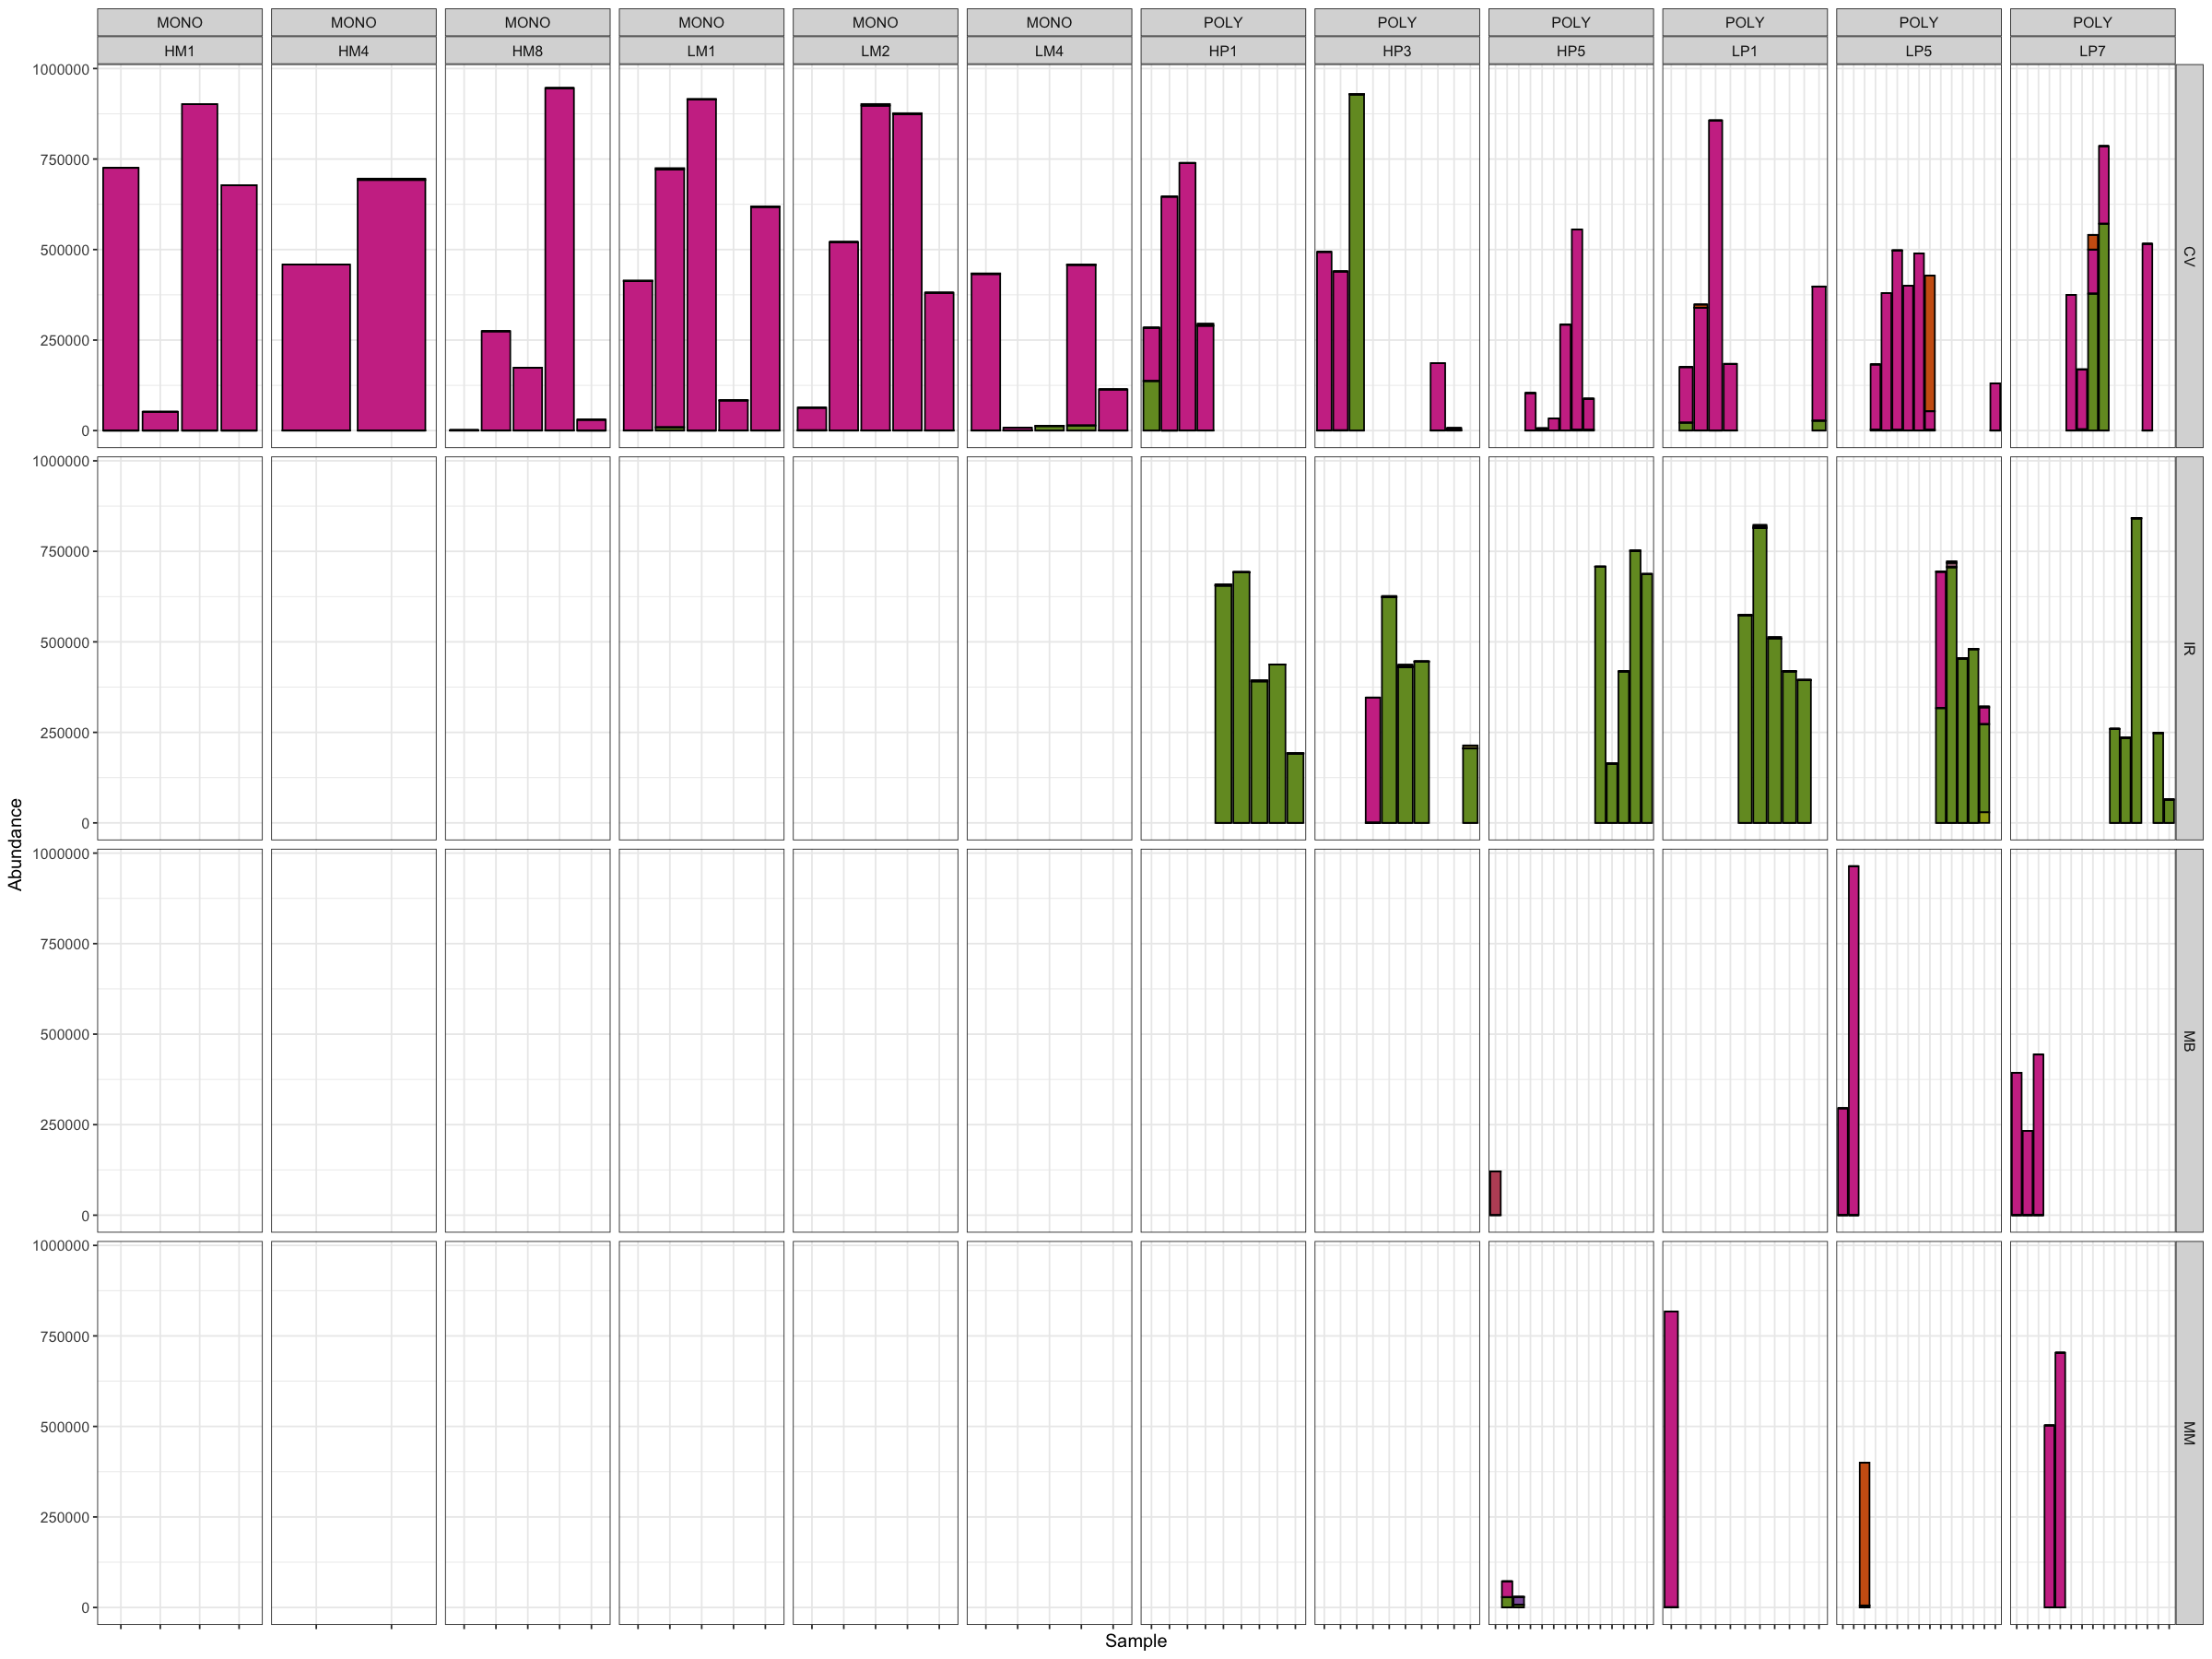

In [54]:
plot_bar(Spiro_allf, fill="OTU")+
scale_fill_manual(values=mycolors)+
theme_bw()+
facet_grid(Species~Treatment2_Diversity+Color_Bucket, scales="free_x")+
theme(legend.position = "none", text = element_text(size=12), axis.text.x = element_blank())


Can you look at abundance of surviving mussels at the end. 

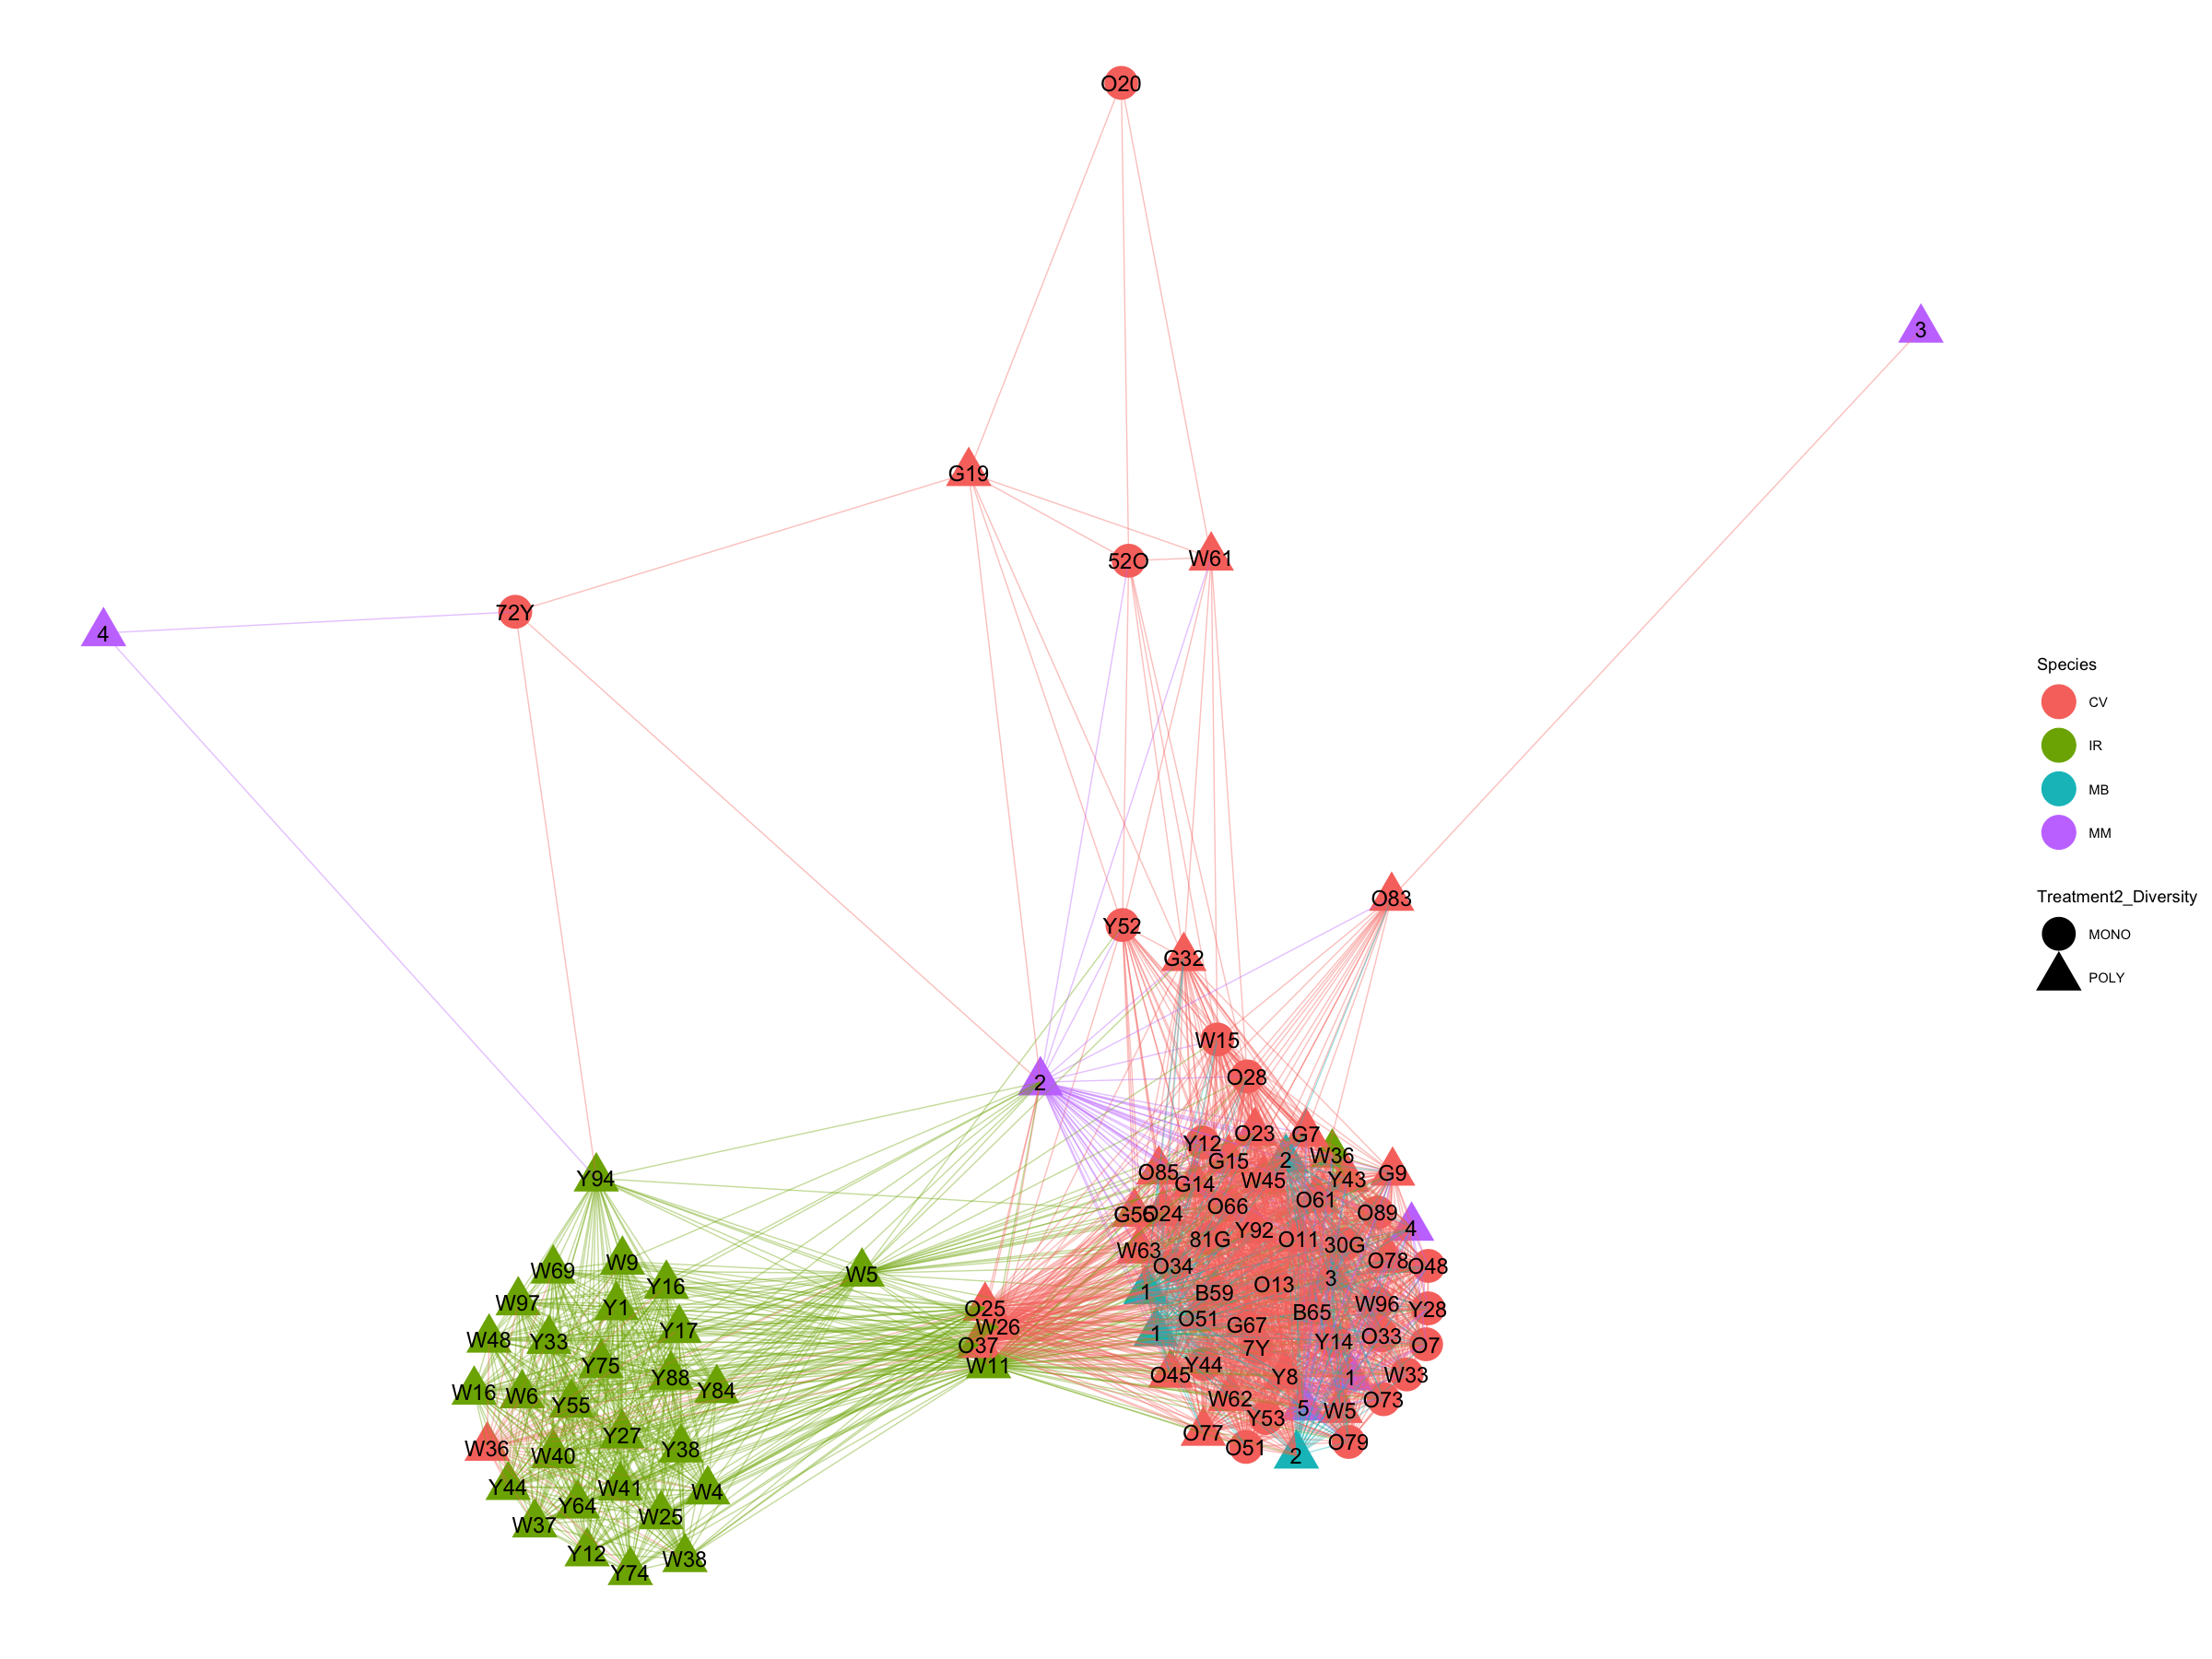

In [335]:
spnw = make_network(Spiro_all, type = "samples", distance = "bray", max.dist = 0.85)
plot_network(spnw, Spiro_all, color = "Species", shape = "Treatment2_Diversity",  line_weight = 0.4, 
    label = NULL, point_size=10)+
geom_text(mapping = aes(label = Number), size = 5) 

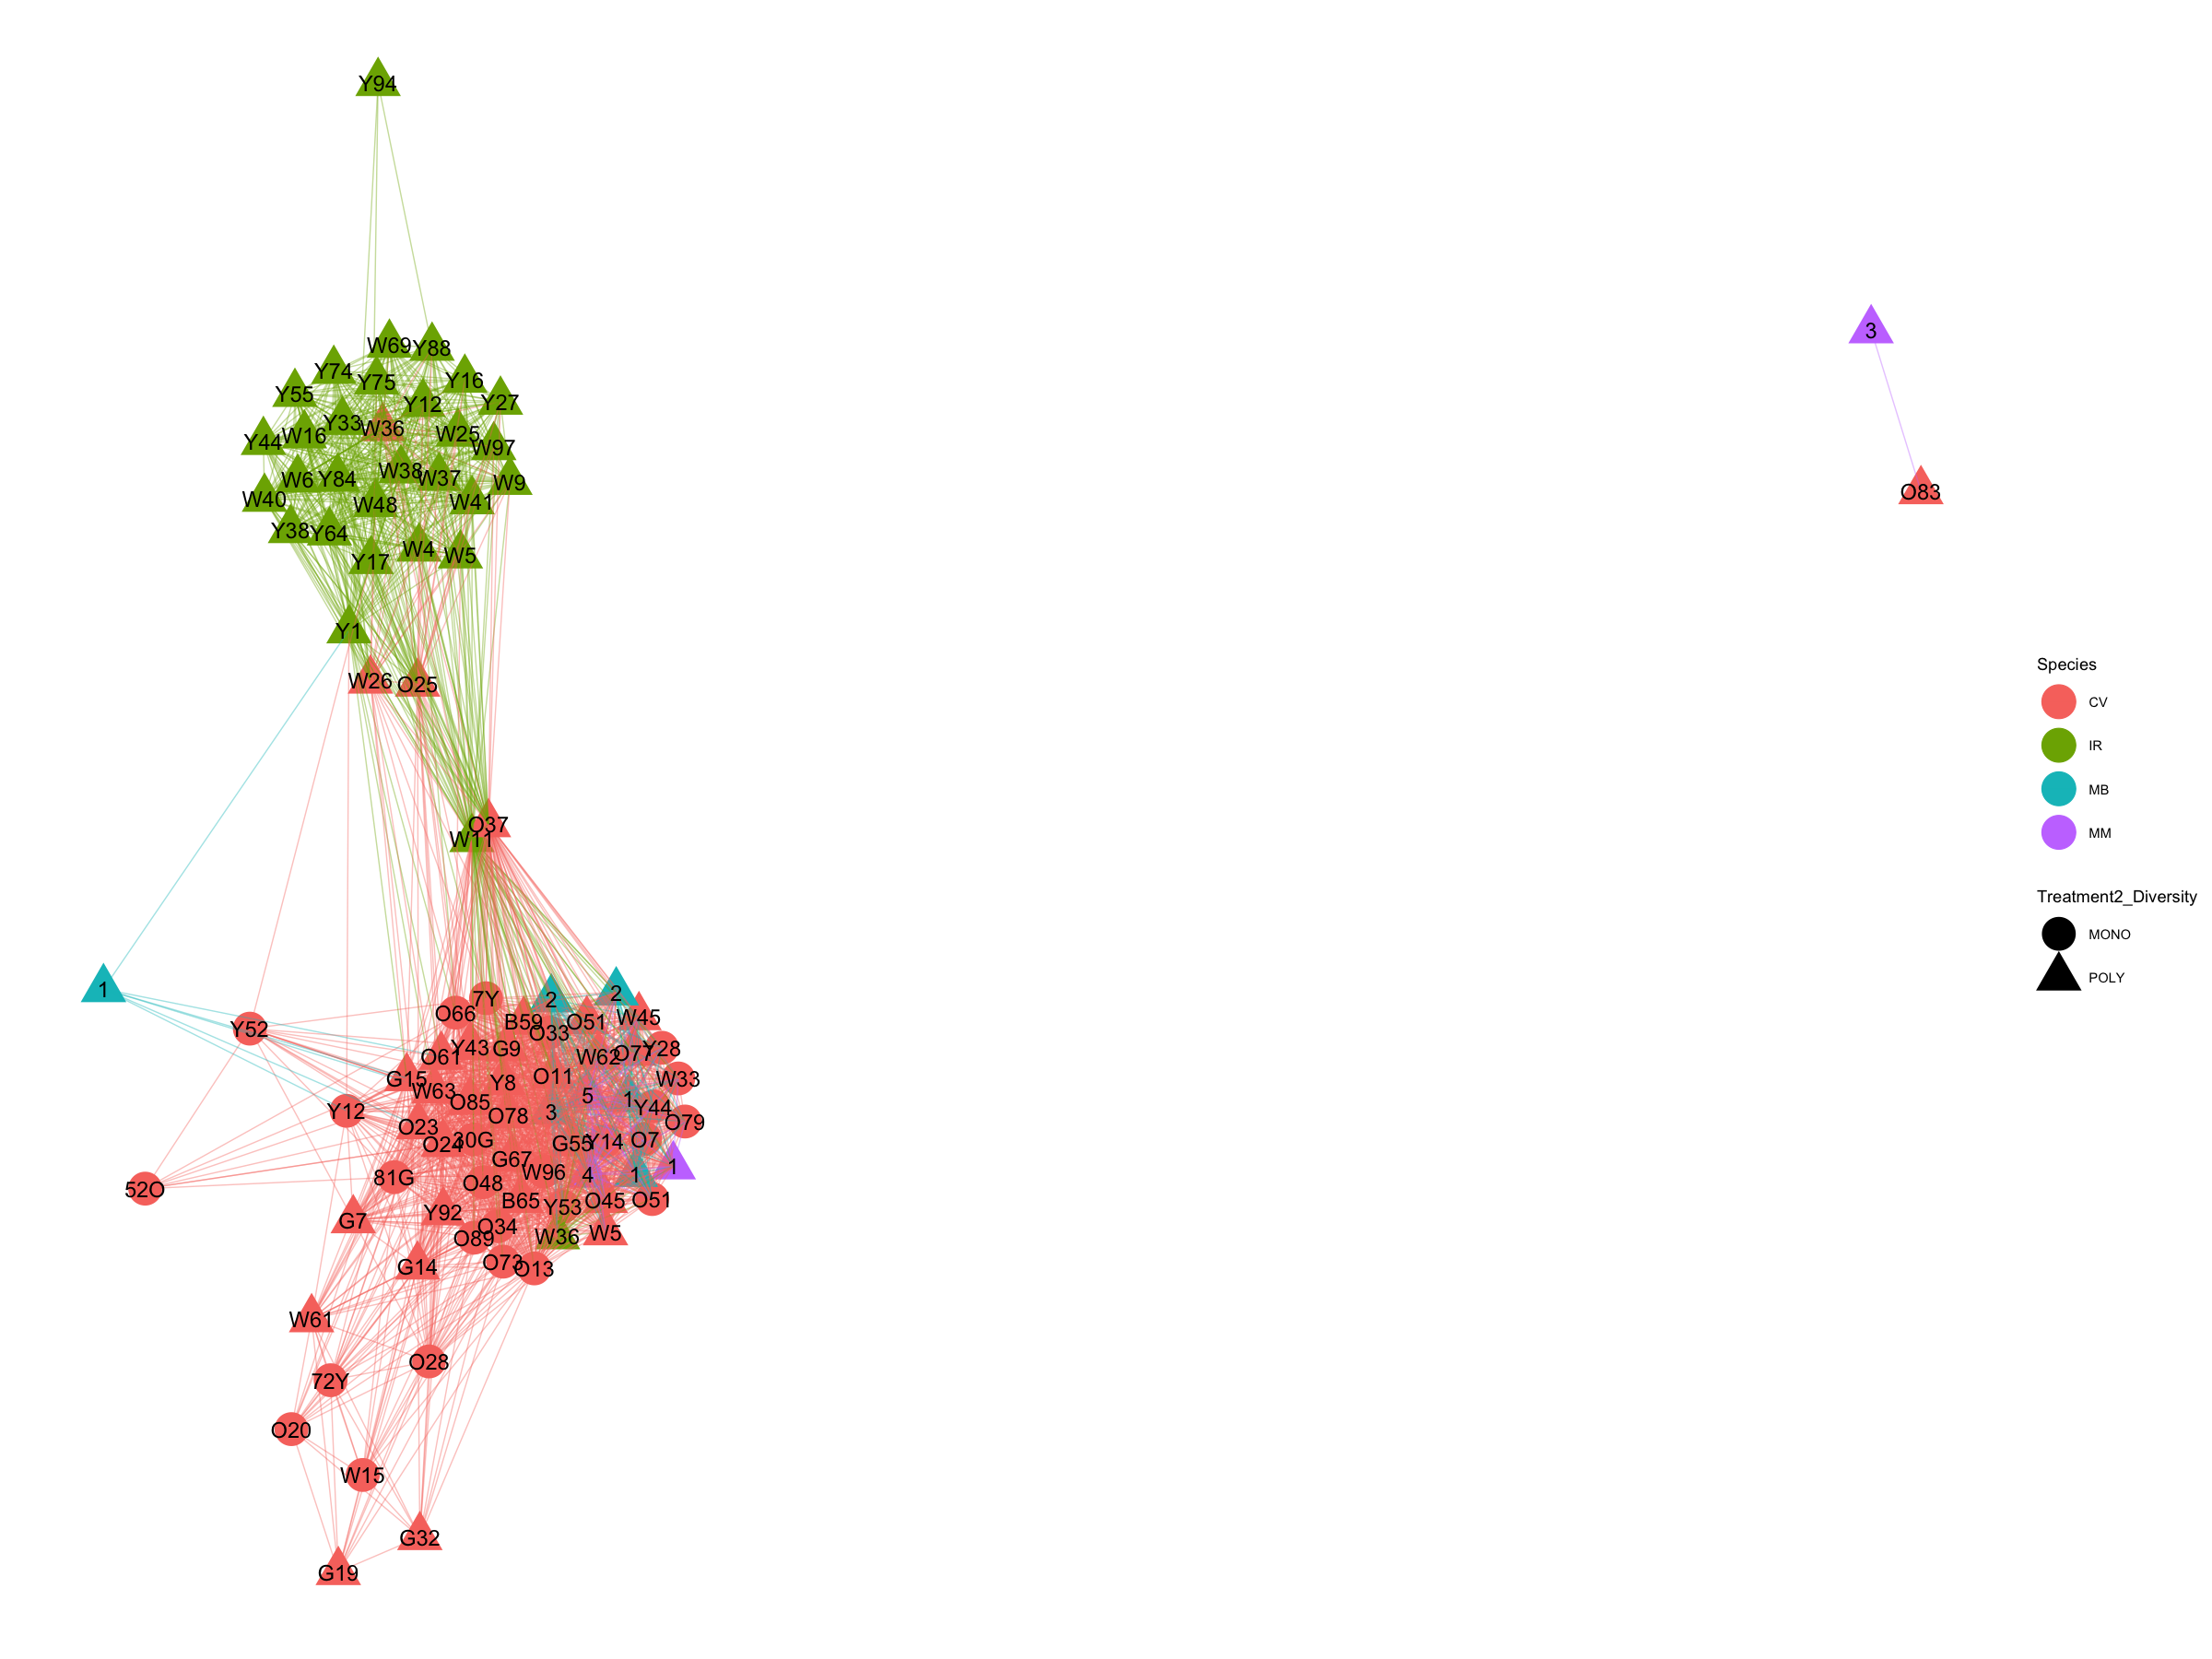

In [336]:
denw = make_network(DE, type = "samples", distance = "bray", max.dist = 0.85)
plot_network(denw, DE, color = "Species", shape = "Treatment2_Diversity",  line_weight = 0.4, 
    label = NULL, point_size=10)+
geom_text(mapping = aes(label = Number), size = 5) 

Need to do SIMPER analysis maybe? Spirochaetes are clearly driving these patterns. only a few very slight changes, division between oysters and mussels and those oysters that cluster with mussels is the same!
Main message is that CV and IR are both dominated by spirochetes, but have different strains. When co-cultured, can swap dominant strains. Clams seem to predominantly have cv-associated strain, with a few exception, including that one Pink strain, which was also found in a cv in the same bucket. 

Possible journals to send this to: 
FEMS microbiology ecology (3.675)
Aquatic Microbial ecology (2.024)
Animal Microbiome (no IF yet, split from Microbiome, OA=2k dollars but may be waived)


The dominant spirochete OTU matches 100% Spirochaete-1 from Pimentel 2020
AAGGAGGTGATCCAACCACAGCTTCCGCTACGGTCGCCTTGTTACGACTTAACCCTCCTTACCAAATCCACCTTCGGCGCATCCCCCCAAAAGGTTGGTACTGCGACTTCGGGTAAAAT CGATTCGGATGGTTTGACGGGCGGTGTGTACAAGGCTCGAGAACGCATTCACCGCGGCATGCTGATCCGCGATTACTAGTGATTCCAGCTTCATGGAGTCGAATTGCAGACTCCAATCC GAACTAAGAGTTCTTTTTTGAGATTGGCTTGGCTTCGCAGCTTAGCATCTCTTTGTAGAACCCATTGTAGCACGTGTGTAGCCCTGGACATAAGGGCCATGAGGACTTGACGTCATCCAC TCCTTCCTCCTGGTTATCCACAGGCAGTCTCCTAAGAGTTCTTCGCTTCGAAAAGCGACTAGCAACATAGGACATGGGTTGCGCTCGTTGCGGGACTTAACCCAACATTTCACAACACG AGCTGACGACAGCCATGCAGCACCTCGCCTACCGCCCCGAAGGGAAAACGACTTTCATCGTCTGTCAATAGACGTTTAAGCCCAGGTAAGGTTCTTCGCGTATCATCGAATTAAACCAC ATGCTCCACCACTTGTGCGAGCCCCCGTCAATTTCTTTGAGTTTCACACTTGCGTGCATACTACCCAGGCGGTACACTTAATGCGTTAGCTACGTTTCAAAAGAAAACTTTCGTCATCCC TTAAAGCTAGTGTACAGTGTTTACGGCTAGGACTACTGGGGTCTCTAATCCCATTTGCTCCCCTAGCTTTCGTGCCTCAGCGTCAGTCATTACCCAGTAGCTTGTCTTCACCCTTGGTGTT CCTCCTGATATCTACAGATTTCACTCCTACACCAGGAATTCCCGCTACCTCTATCTATGACTCTAGCCCAACAGTATCAGCAGCAGCTTCGTGGTTGAGCCACGAAATTTCACAACTGAC TTGATGAGCAGCCTGCGCACCCTTTACGCCCAGTGATTCCGAACAACGTTCGCCCCCTACGTATTACCGCGGCTGCTGGCACGTAGTTAGCCGGGGCTTCTTTTGCAGGTACCGTCATCT ACAGCACATTTCCTTACTGTATTATTCTTTCCTGCCGAAAGGACTTTACAACTCGAAAGCCTTCATCGTCCATGCGAAATTGCTCCGTCAGGGTTTCCCCCATTGCGGAATATTCTCAGCT GCTGCCTCCCGTAGGAGTCTGGGCCGTATCTCAGTCCCAGTGTGGCCGATCGCCCTCTCAGGCCGGCTACCTATCATCGCCTTGGTAGGCTCTTACCCTACCAACAAGCTAATAGGGGTT AGCCCTATCCTCCAGTGGTACCAACGCACCTTTTAAGTTTCCTCAATATCGGGCATTAATCACCATTACAGTGGCTATTCCCGTCTGGAGGGCAAGTTGCTAACTTCTACTCACCCGTTC GCCGCTTGCCACCCGAAGTGCTGCCGCTCGACTTGCATGCTTAAAACATCTCGCTAACGTTCGTTCTGAGCCAGAATCAAACTCTTCATCATAGAA

## Look at relationships between Spiros and growth

In [1]:
d=read.csv("~/Documents/DE_16S/DE2018_alldata.csv")
w=read.csv("~/Documents/DE_16S/Dry_Weight.csv")

In [2]:
cv=d[d$Species=="CV"& !is.na(d$Weight_post)& !is.na(d$Weight),]


In [3]:
d$Length_post=as.numeric(as.character(d$Length_post))
d$Length_pre=as.numeric(as.character(d$Length_pre))
d$Weight_change=d$Weight_post-d$Weight
d$Length_change=d$Length_post-d$Length_pre
d$Width_change=d$Width_post-d$Width_pre

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [4]:
colnames(d)

[1] "Bucket"                "Color.Number"          "Old.New"              
 [4] "Species"               "Date_initial_measure"  "Length_pre"           
 [7] "Width_pre"             "Height_pre"            "Weight"               
[10] "Mortality_Date"        "Date_FinalMeasurement" "Length_post"          
[13] "Width_post"            "Height_post"           "Weight_post"          
[16] "live_barnacles"        "dead_barnacles"        "polydora_scars"       
[19] "RFTM_Date"             "RFTM_score"            "Parasites"            
[22] "X"                     "Weight_change"         "Length_change"        
[25] "Width_change"

In [13]:
dsimp=d[c(1,2,4,23:25)]
meta_de_meas=merge(meta_de, dsimp, by.x=c("Number", "Species", "Color_Bucket"), by.y=c("Color.Number", "Species", "Bucket"))

In [19]:
write.csv(meta_de_meas, file="~/Documents/DE_16S/De2018_measurements.csv")

In [14]:
rownames(meta_de_meas)=meta_de_meas$UniqueID
meas=sample_data(meta_de_meas)
sample_data(Spiro_all)=meas

ERROR: Error in sample_data(Spiro_all) = meas: object 'Spiro_all' not found


In [344]:
rank_names(Spiro_all)[2]

[1] "Phylum"

In [345]:
Spiro_simp=tax_glom(Spiro_all, rank_names(Spiro_all)[2])
Spirodf = psmelt(Spiro_simp)
colnames(Spirodf)
NROW(Spirodf)


[1] "OTU"                  "Sample"               "Abundance"           
 [4] "Number"               "Species"              "Color_Bucket"        
 [7] "V1"                   "UniqueID"             "Experiment"          
[10] "Year"                 "Site"                 "Treatment1_Density"  
[13] "Treatment2_Diversity" "RFTM_score"           "peacrabs"            
[16] "Phase_1_DO"           "Phase_1_temp"         "Phase_2_DO"          
[19] "Phase_2_Temp"         "Overall_treatment"    "Weight_change"       
[22] "Length_change"        "Width_change"         "Kingdom"             
[25] "Phylum"

[1] 98

In [349]:
head(Spirodf)

OTU                                                                                                                                                                                                                                                            
72 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
10 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
23 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
47 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
3  TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
52 TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG
   Sample                    Abundance Number Species Color_Bucket V1 
72 2018__LOW_POLY_LP52_MB    965367.5  2      MB      LP5          213
10 2018__HIGH_MONO_HM8Y28_CV 946883.7  Y28    CV      HM8          126
23 2018__HIGH_POLY_HP3W36_CV 930153.3  W36    CV      HP3          138
47 2018__LOW_MONO_LM1O51_CV  919990.8  O51    CV      LM1          158
3  2018__HIGH_MONO_HM1W33_CV 902191.6  W33    CV      HM1          114
52 2018__LOW_MONO_LM2O7_CV   901998.9  O7     CV      LM2          161
   UniqueID                  Experiment Year ⋯ Phase_1_DO Phase_1_temp
72 2018__LOW_POLY_LP52_MB    Lab18      2018 ⋯                        
10 2018__HIGH_MONO_HM8Y28_CV Lab18      2018 ⋯                        
23 2018__HIGH_POLY_HP3W36_CV Lab18      2018 ⋯                        
47 2018__LOW_MONO_LM1O51_CV  Lab18      2018 ⋯                        
3  2018__HIGH_MONO_HM1W33_CV Lab18      2018 ⋯                        
52 2018__LOW_MONO_LM2O7_CV   Lab18      2018 ⋯                        
   Phase_2_DO Phase_2_Temp Overall_treatment Weight_change Length_change
72                                             NA              NA       
10                                           1.38          -12.23       
23                                           6.25            0.80       
47                                           7.45           -0.85       
3                                            5.04            0.36       
52                                           5.39            8.44       
   Width_change Kingdom  Phylum       
72   NA         Bacteria Spirochaetota
10 2.83         Bacteria Spirochaetota
23 4.16         Bacteria Spirochaetota
47 2.58         Bacteria Spirochaetota
3  0.31         Bacteria Spirochaetota
52 4.69         Bacteria Spirochaetota

Warning message:
“Removed 23 rows containing missing values (geom_point).”
Warning message:
“Removed 23 rows containing missing values (geom_text).”


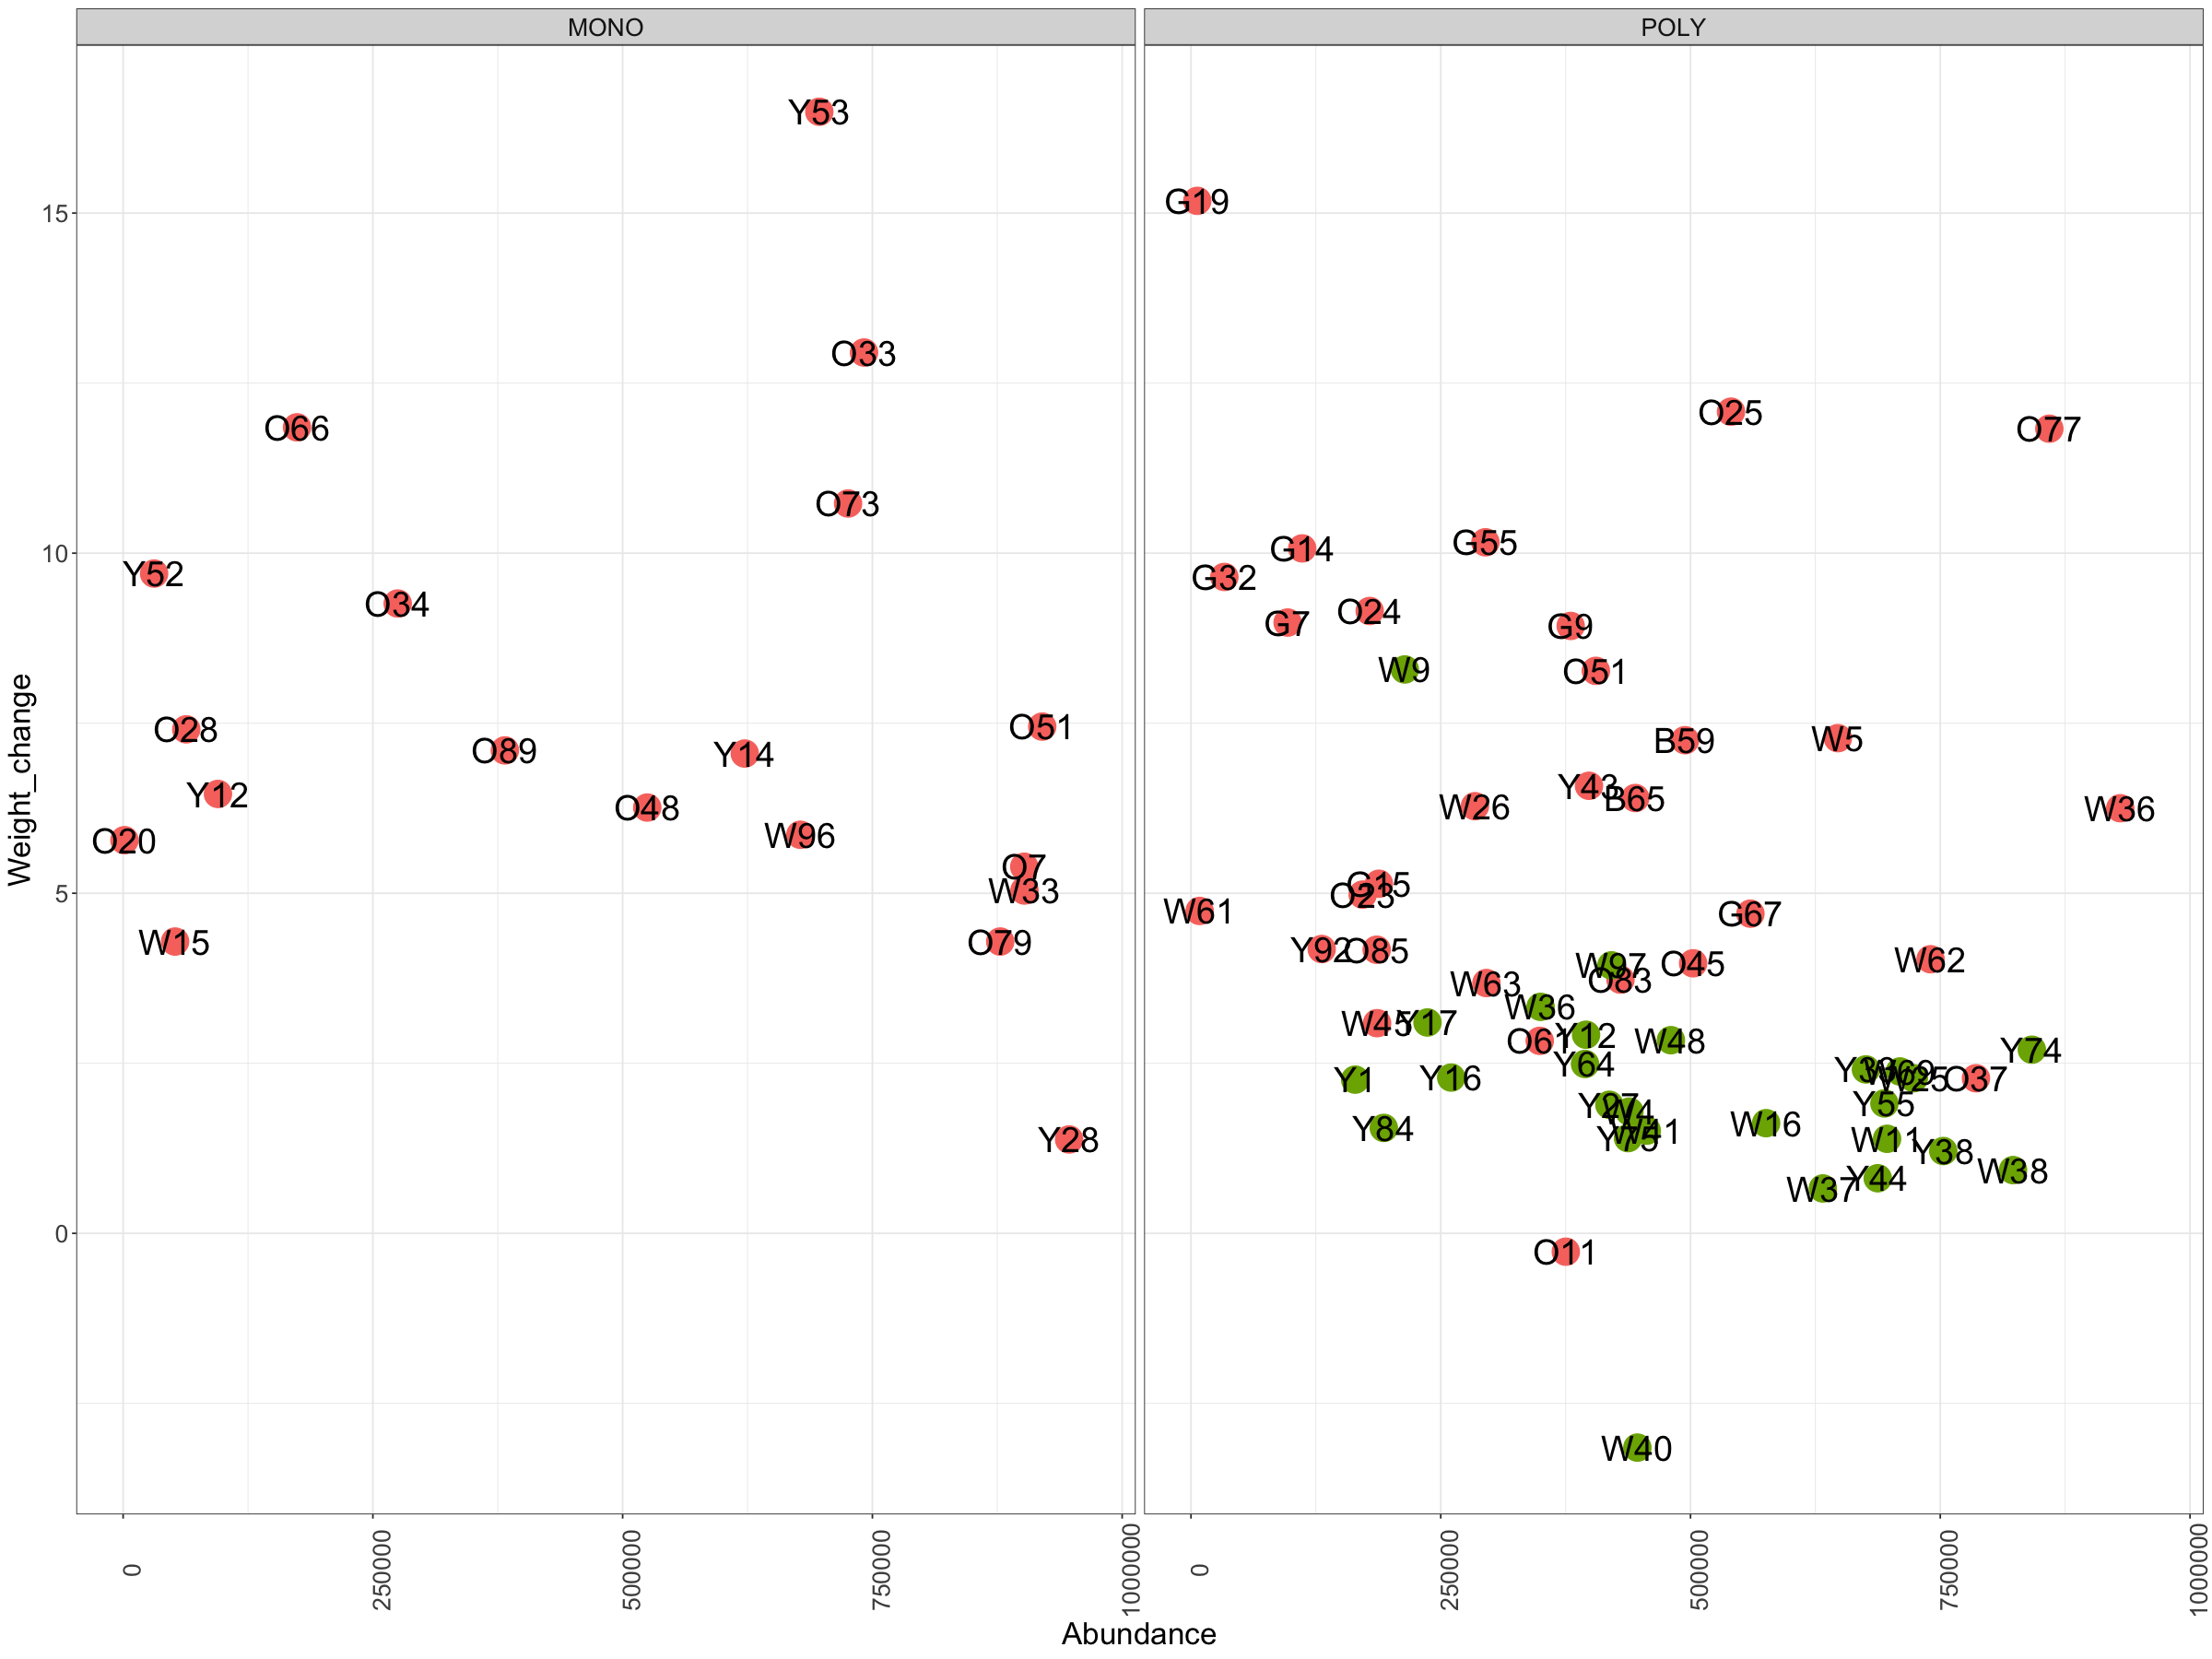

In [354]:
ggplot(Spirodf, aes(x=Abundance, y=Weight_change, color=Species))+
geom_point(aes(fill=Species), size=8)+
facet_grid(.~Treatment2_Diversity)+
theme_bw()+
geom_text(aes(label=Number), color="black", size=8)+
theme(legend.position = "none", text = element_text(size=20), axis.text.x = element_text(angle = 90))
